## Do an exploratory data analysis for the Starbuck Dataset considering the Nutrition Facts along. 

In [1]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from matplotlib import style
style.use("ggplot")

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
starbucks = pd.read_csv("starbucks_drinkMenu_expanded.csv")    #Accessing the csv file

In [3]:
starbucks.info()                                            # basic information regarding the dataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [4]:
starbucks.head()                                       # viewing the top 5 datas from the dataframe

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [5]:
starbucks.duplicated().sum()                       # checking for duplicate cells

0

In [6]:
starbucks.isnull().sum()                           # checking for null values

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [7]:
starbucks.value_counts("Beverage_category")          # counting the no.of sub-categories in each Beverage category

Beverage_category
Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
dtype: int64

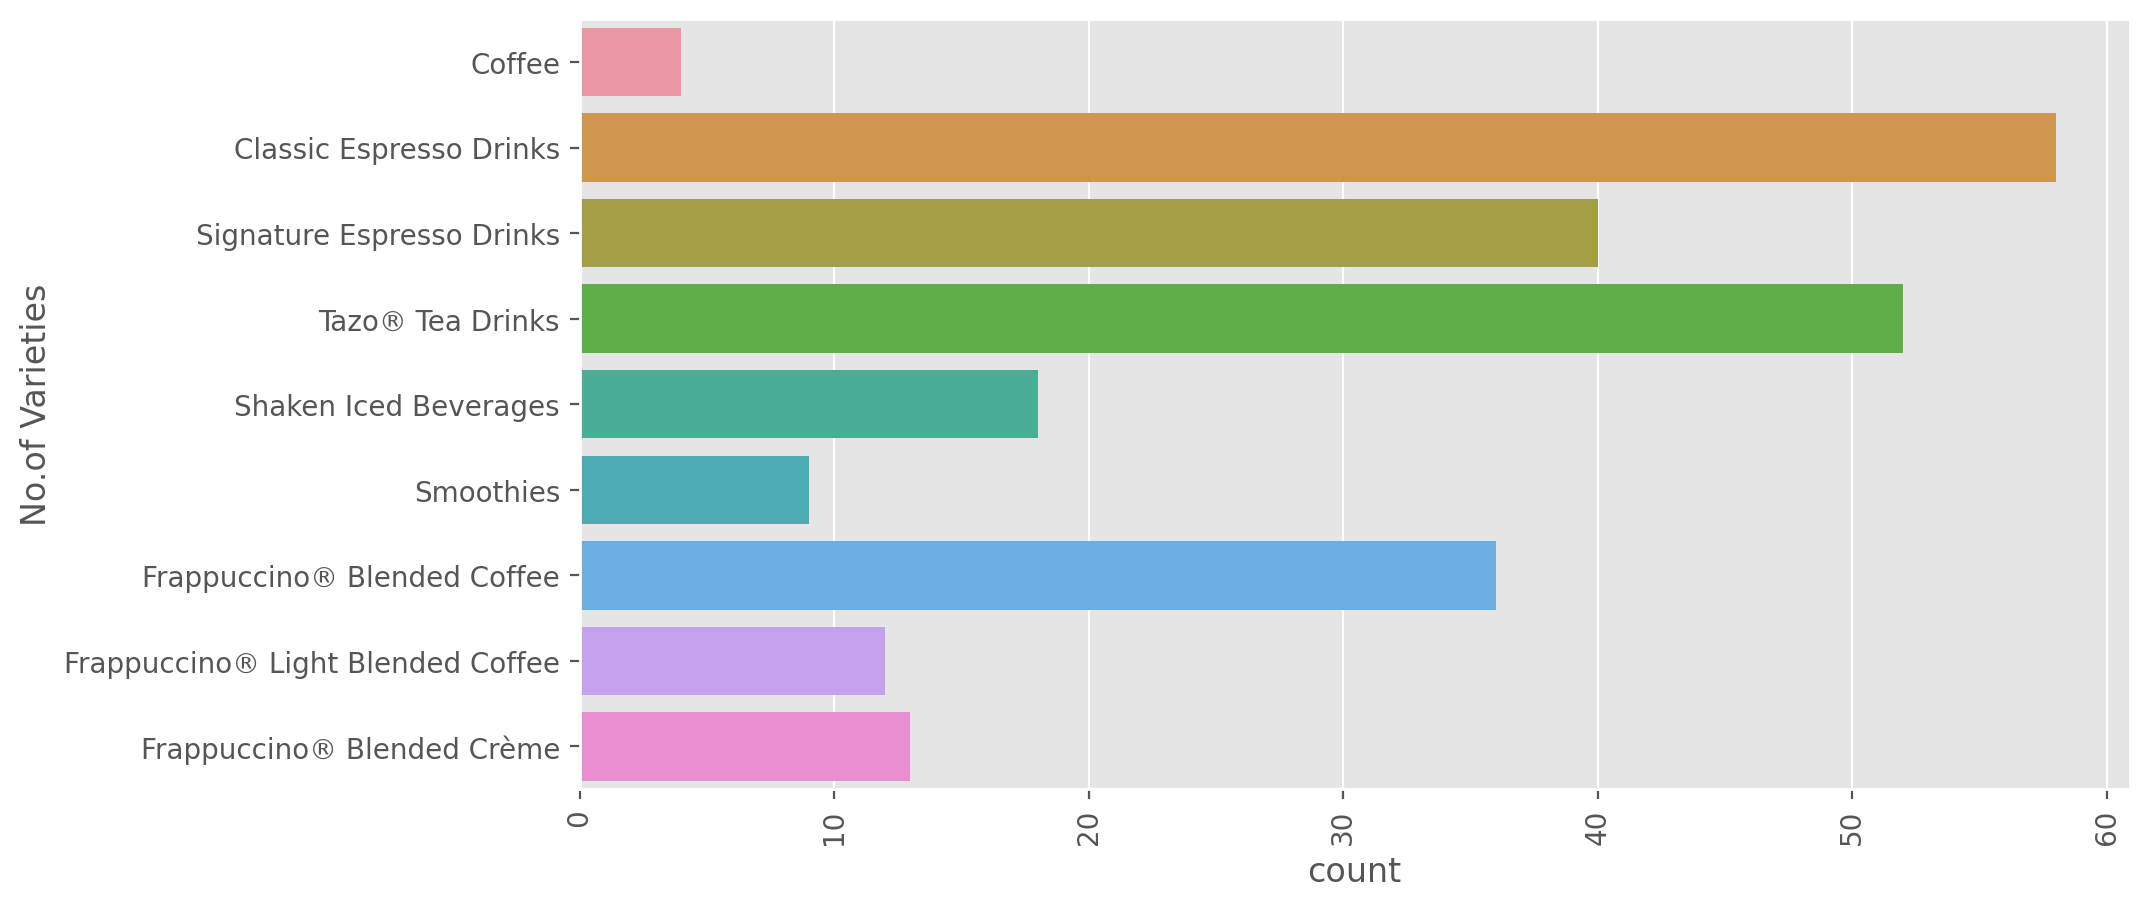

In [8]:
# visualising the no.of varities in each beverage category
plt.figure(figsize=(10,5),dpi=200)
sns.countplot(y="Beverage_category",data = starbucks)
plt.xticks(rotation=90)
plt.ylabel("No.of Varieties")
plt.show()

In [9]:
starbucks.columns                # checking the list of columns 

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [10]:
starbucks.groupby(by = "Beverage_category")["Calories"].max().sort_values() #checking which category has highest calories

Beverage_category
Coffee                                 5
Shaken Iced Beverages                190
Frappuccino® Light Blended Coffee    290
Smoothies                            300
Classic Espresso Drinks              340
Frappuccino® Blended Crème           350
Tazo® Tea Drinks                     450
Frappuccino® Blended Coffee          460
Signature Espresso Drinks            510
Name: Calories, dtype: int64

## Analyzing and visualizing the nutrition facts of the Beverages

In [11]:
calories=starbucks.sort_values(by = "Calories",ascending=False)
calories

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13,6.0,0.0,5,290,70,1,64,16.0,15%,2%,60%,20%,150
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7,6.0,0.0,10,310,78,0,74,19.0,25%,2%,60%,2%,150
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10,5.0,0.3,40,230,72,2,71,17.0,25%,20%,50%,6%,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies


Text(0.5, 1.0, 'Low calorie beverage')

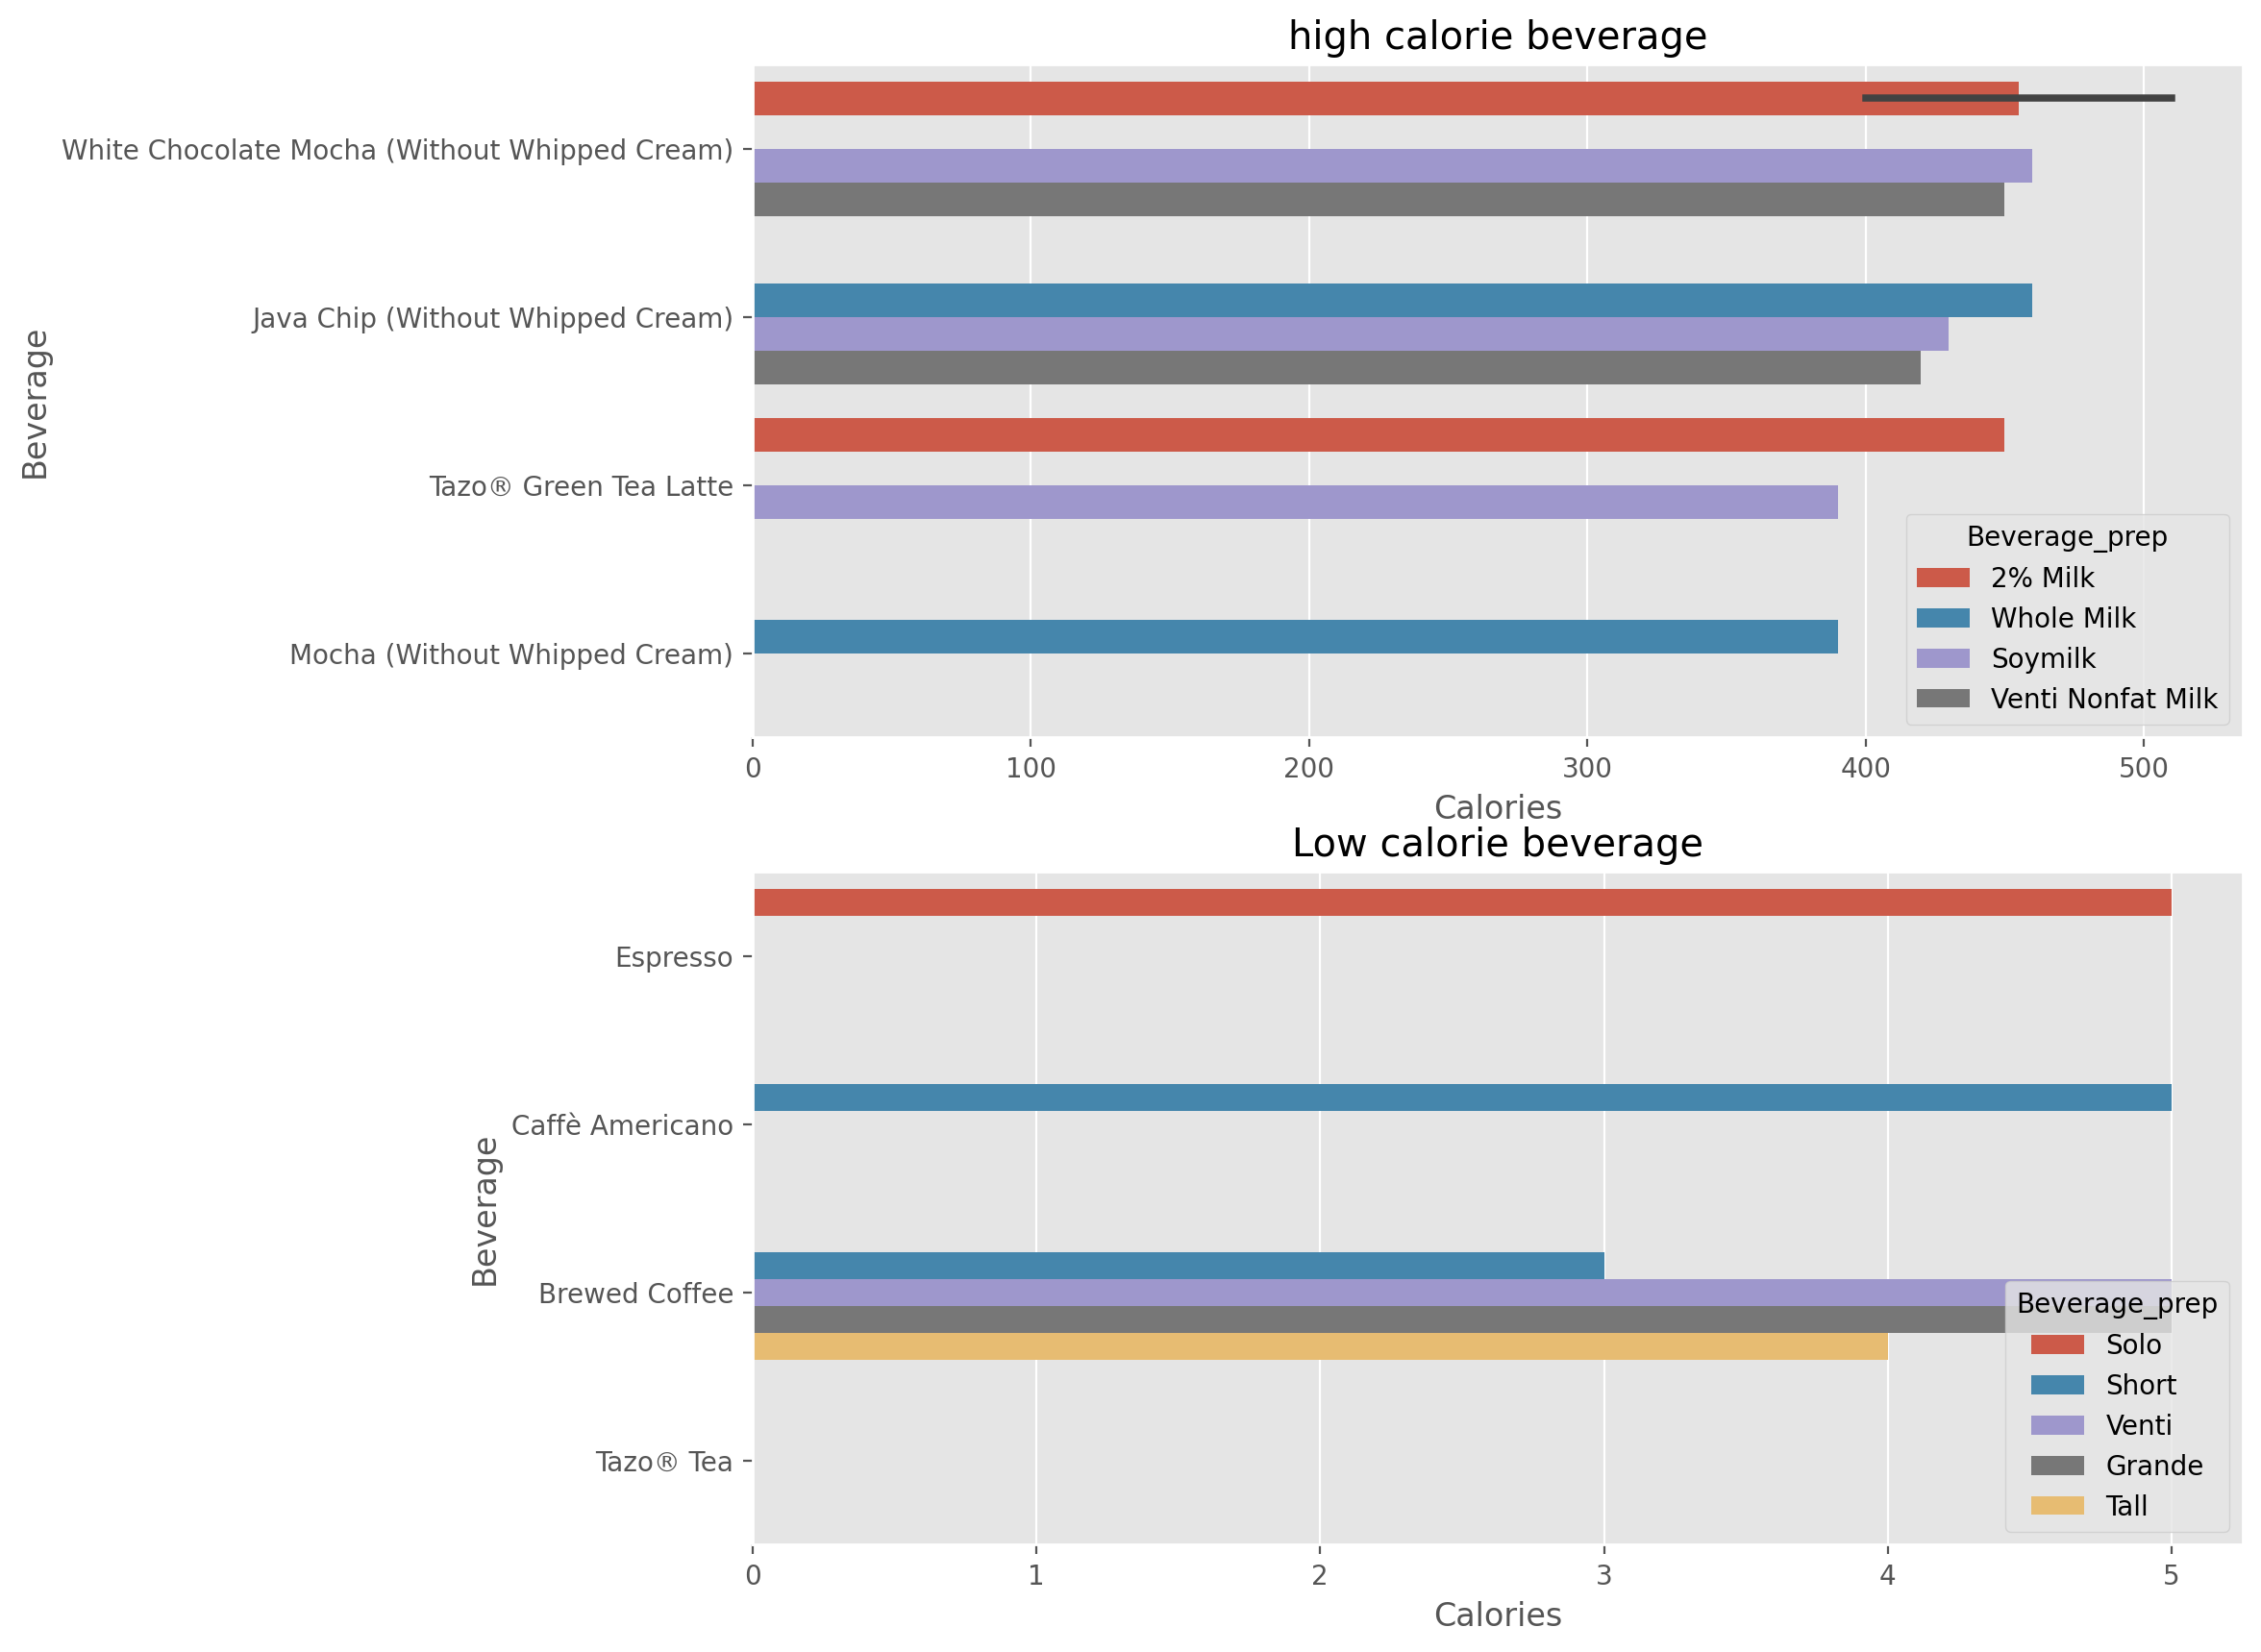

In [12]:
plt.figure(figsize=(10,10),dpi=200)

plt.subplot(2,1,1)
sns.barplot(y='Beverage',x="Calories",hue="Beverage_prep",data=calories.head(10))
plt.title("high calorie beverage")

plt.subplot(2,1,2)
sns.barplot(y='Beverage',x="Calories",hue="Beverage_prep",data=calories.tail(10))
plt.title("Low calorie beverage")

In [13]:
starbucks[" Total Fat (g)"].replace("3 2",3.2,inplace=True)
starbucks[" Total Fat (g)"]=starbucks[" Total Fat (g)"].apply(float)
total_fat=starbucks.sort_values(by=" Total Fat (g)",ascending=False)
total_fat

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13.0,6.0,0.0,5,290,70,1,64,16.0,15%,2%,60%,20%,150
96,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,380,11.0,6.0,0.3,35,200,63,2,54,17.0,25%,2%,50%,30%,30
81,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,400,11.0,7.0,0.2,25,250,61,0,58,15.0,15%,2%,45%,0%,150
26,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,340,11.0,6.0,0.2,30,180,53,2,43,17.0,20%,2%,45%,30%,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0.0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies


Text(0.5, 1.0, 'high Fat beverage')

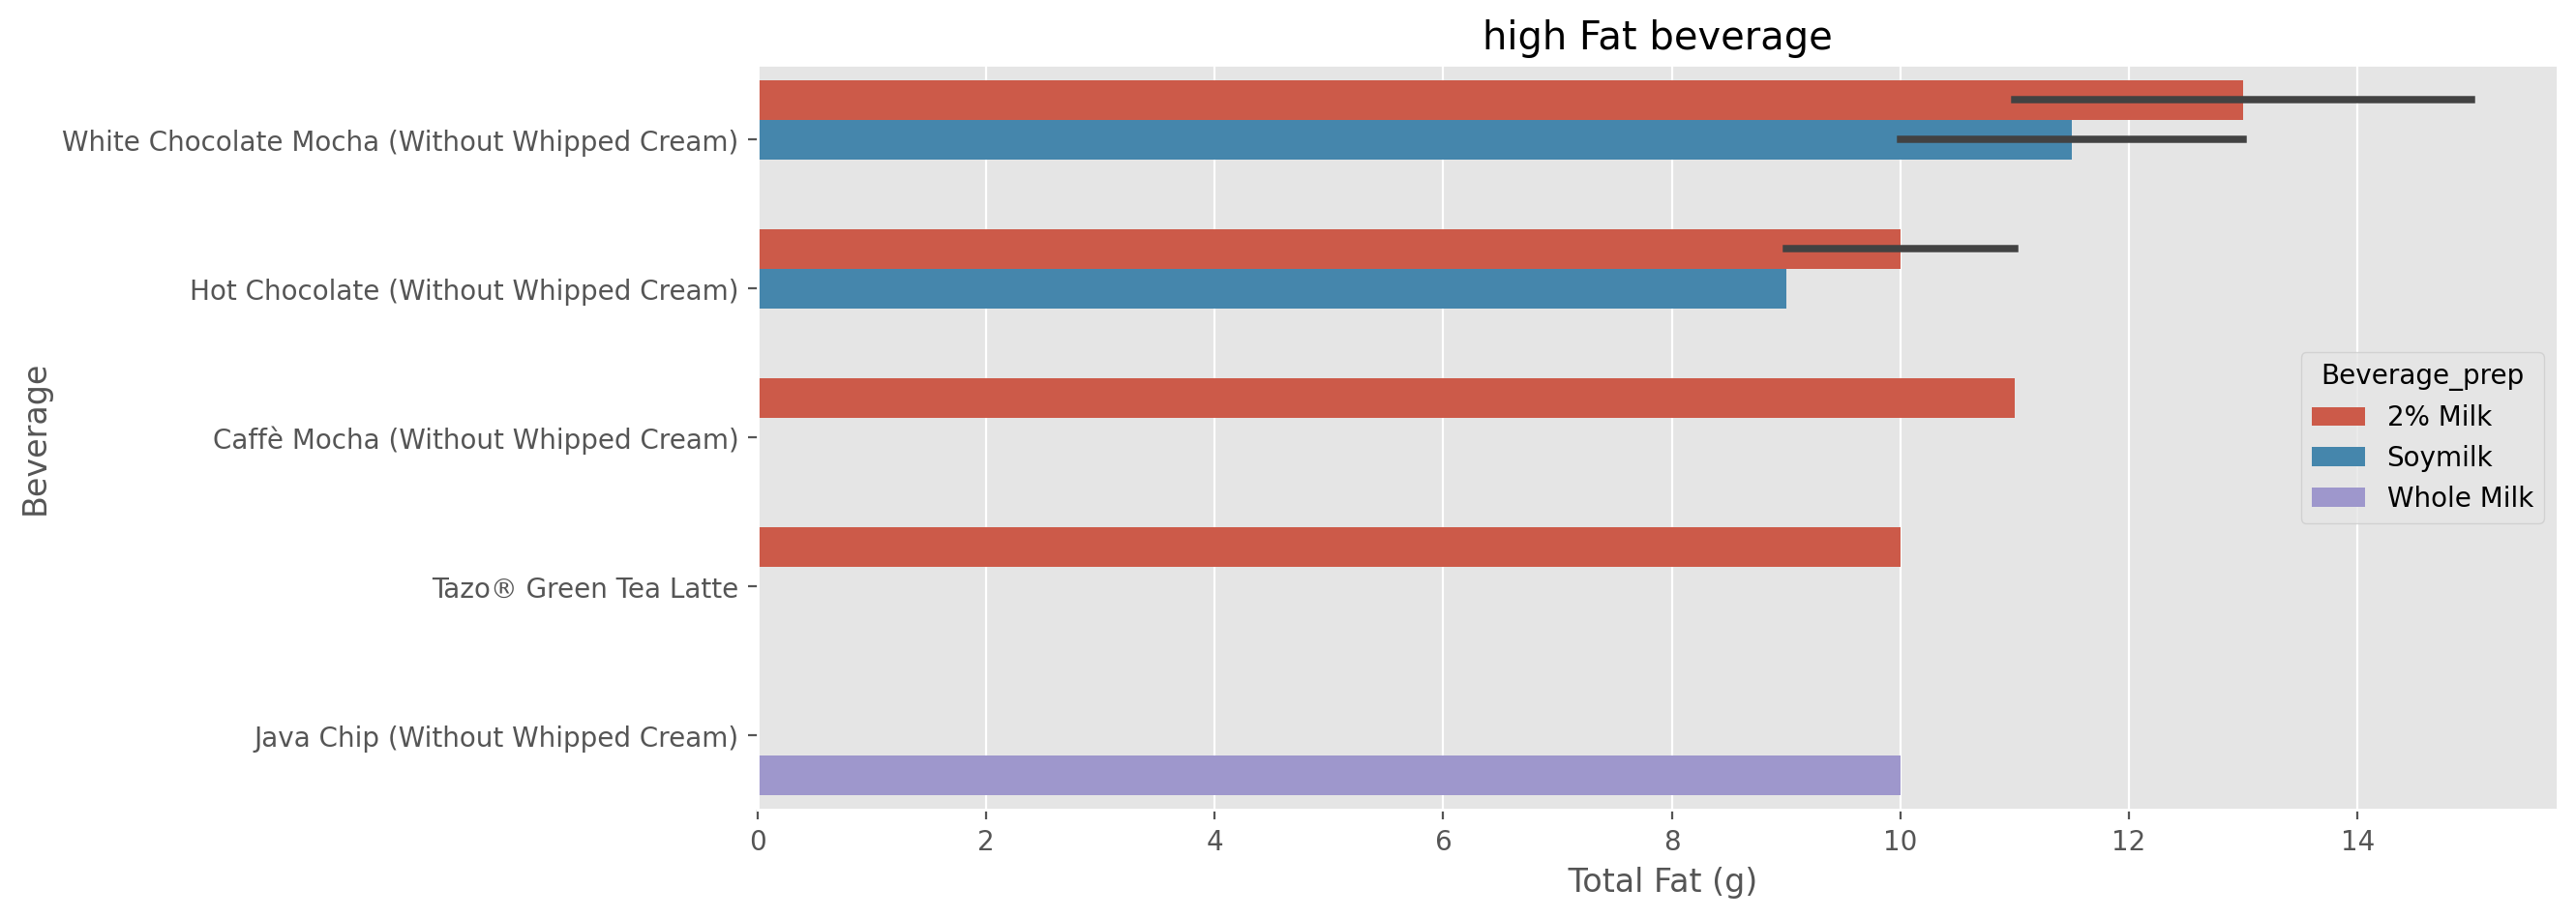

In [14]:
plt.figure(figsize=(12,5),dpi=200)

sns.barplot(y='Beverage',x=" Total Fat (g)",hue="Beverage_prep",data=total_fat.head(10))
plt.title("high Fat beverage")


In [15]:
sodium=starbucks.sort_values(by= " Sodium (mg)",ascending=False)
sodium

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,2% Milk,450,10.0,5.0,0.3,40,230,72,2,71,17.0,25%,20%,50%,6%,110
38,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,320,9.0,4.5,0.3,35,200,46,0,44,15.0,25%,2%,45%,0%,150
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
72,Signature Espresso Drinks,Caramel Macchiato,2% Milk,300,8.0,4.5,0.2,35,180,43,0,40,13.0,20%,2%,40%,0%,150
96,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,380,11.0,6.0,0.3,35,200,63,2,54,17.0,25%,2%,50%,30%,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Tazo® Tea Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Soymilk,210,4.0,0.5,0.0,0,100,34,1,32,7.0,10%,0%,30%,15%,0
150,Tazo® Tea Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Soymilk,170,3.5,0.4,0.0,0,80,27,1,25,6.0,8%,0%,25%,10%,0
147,Tazo® Tea Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6%,0%,20%,8%,0
64,Signature Espresso Drinks,Caramel Macchiato,Soymilk,100,3.0,1.0,0.0,0,60,14,1,11,4.0,6%,0%,15%,8%,75


Text(0.5, 1.0, 'high sodium beverage')

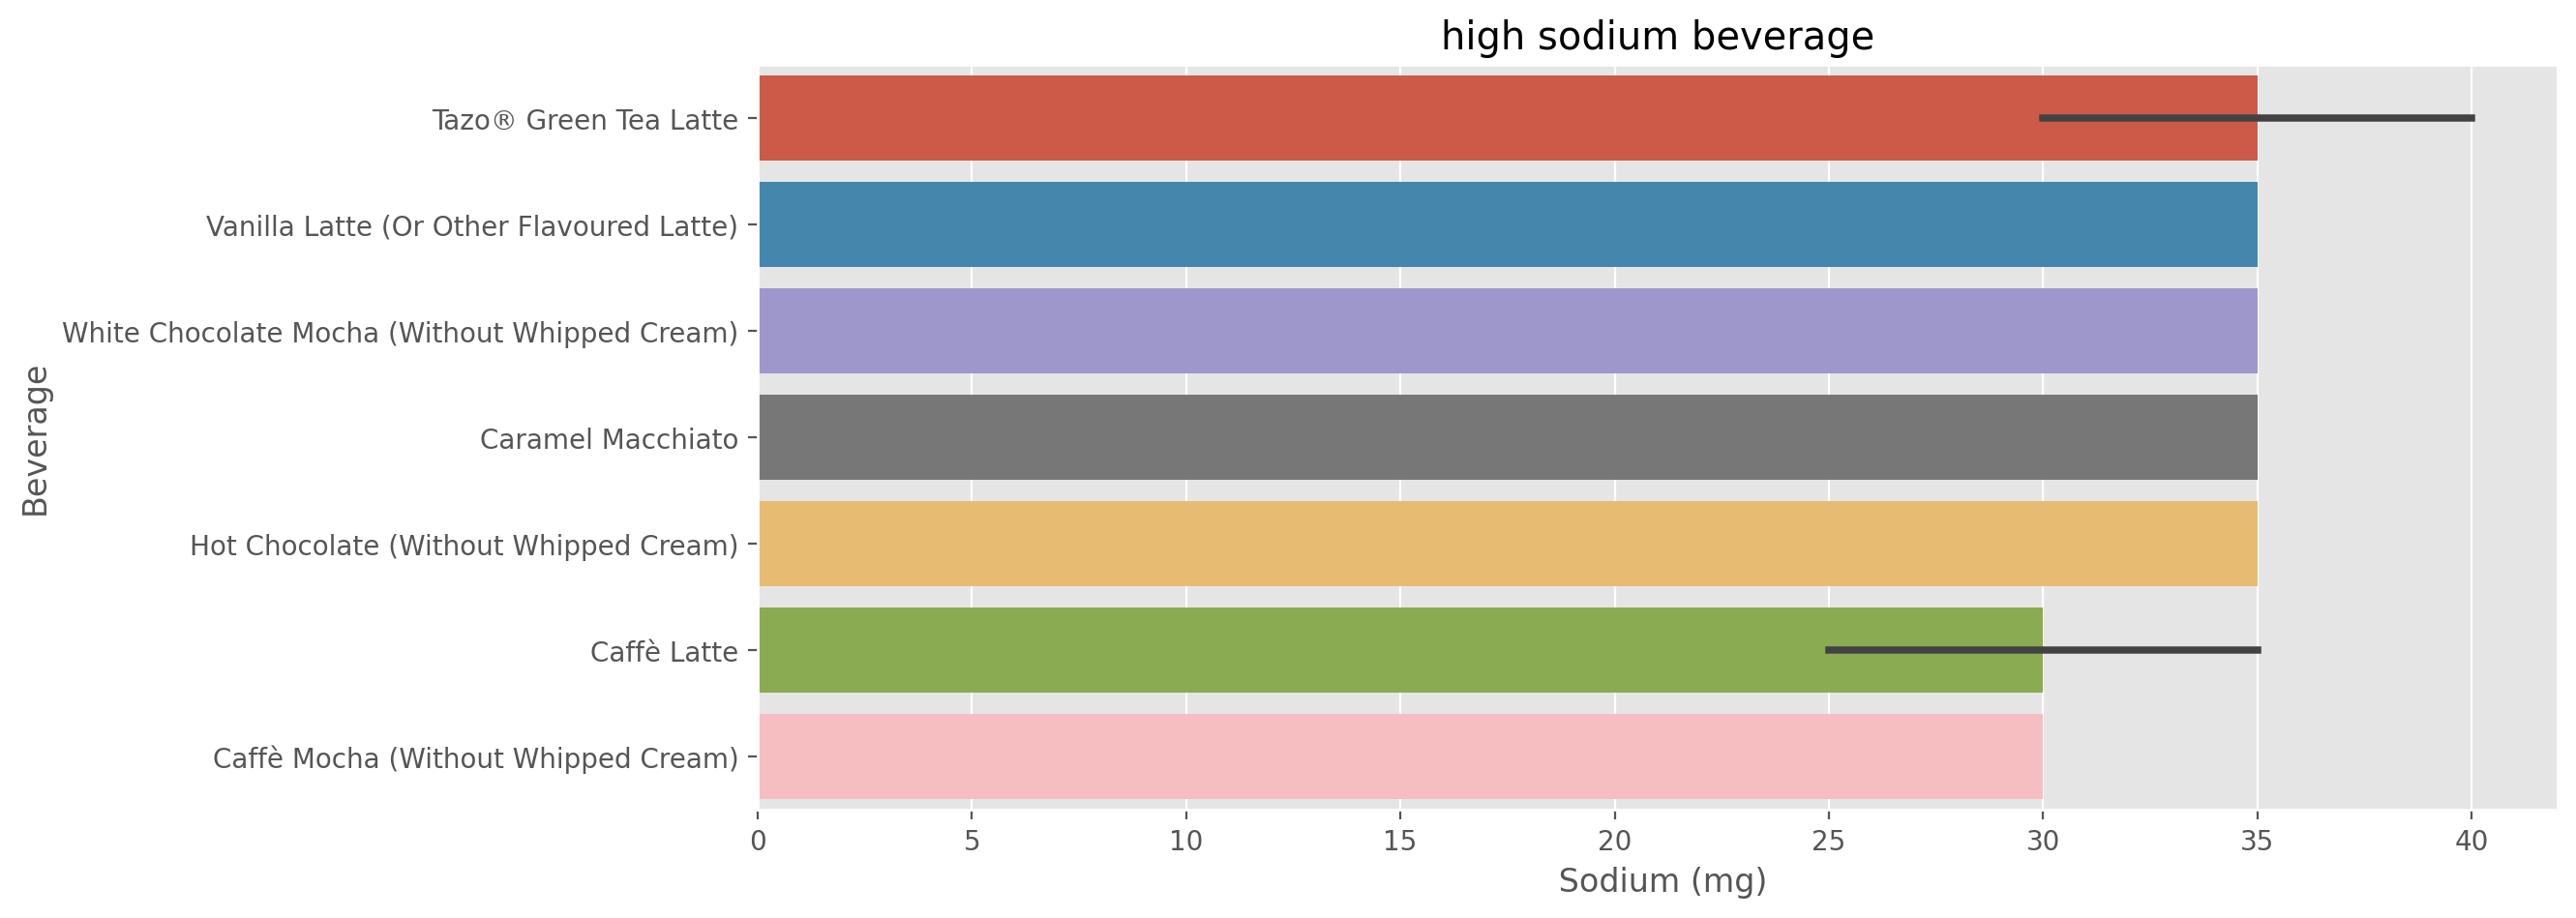

In [16]:
plt.figure(figsize=(12,5),dpi=200)

sns.barplot(y='Beverage',x=" Sodium (mg)",data=sodium.head(10))
plt.title("high sodium beverage")


In [17]:
carbohydrates=starbucks.sort_values(by = " Total Carbohydrates (g) ",ascending=False)
carbohydrates

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10.0,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.0,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8.0,4.5,0.0,0,330,88,3,80,6.0,6%,0%,20%,40%,145
228,Frappuccino® Light Blended Coffee,Java Chip,Venti Nonfat Milk,290,5.0,4.0,0.0,5,320,58,2,52,7.0,8%,0%,15%,35%,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
56,Classic Espresso Drinks,Espresso,Solo,5,0.0,0.0,0.0,0,0,1,0,0,0.4,0%,0%,0%,0%,75


Text(0.5, 1.0, 'high carbohydrated beverage')

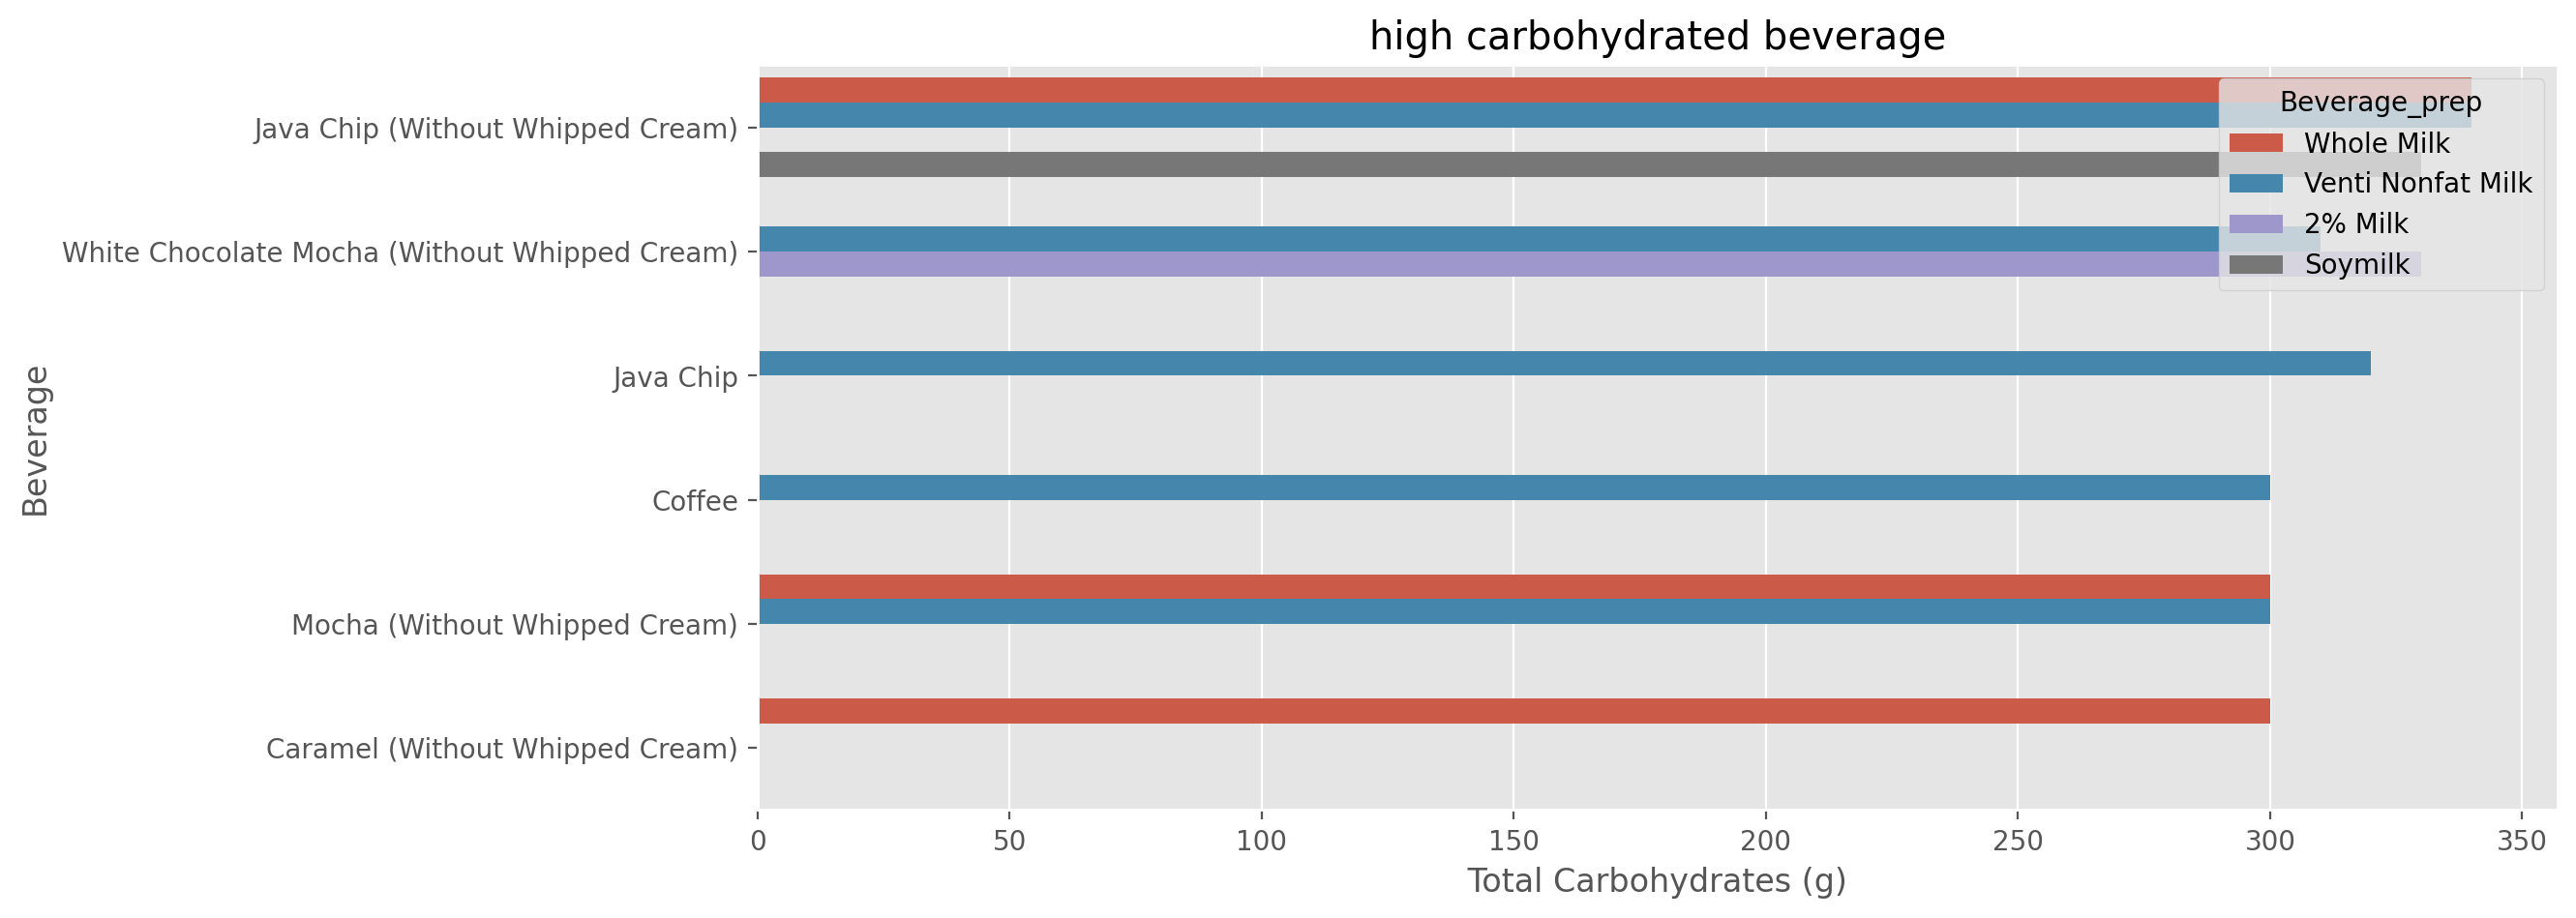

In [18]:
plt.figure(figsize=(12,5),dpi=200)

sns.barplot(y='Beverage',x=" Total Carbohydrates (g) ",hue="Beverage_prep",data=carbohydrates.head(10))
plt.title("high carbohydrated beverage")

In [19]:
cholestrol=starbucks.sort_values(by = "Cholesterol (mg)",ascending=False)
cholestrol


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10.0,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.0,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0.0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8.0,4.5,0.0,0,330,88,3,80,6.0,6%,0%,20%,40%,145
196,Frappuccino® Blended Coffee,Mocha (Without Whipped Cream),Venti Nonfat Milk,340,1.0,0.5,0.0,5,300,80,1,76,7.0,10%,0%,15%,10%,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies


Text(0.5, 1.0, 'Low cholestrol beverage')

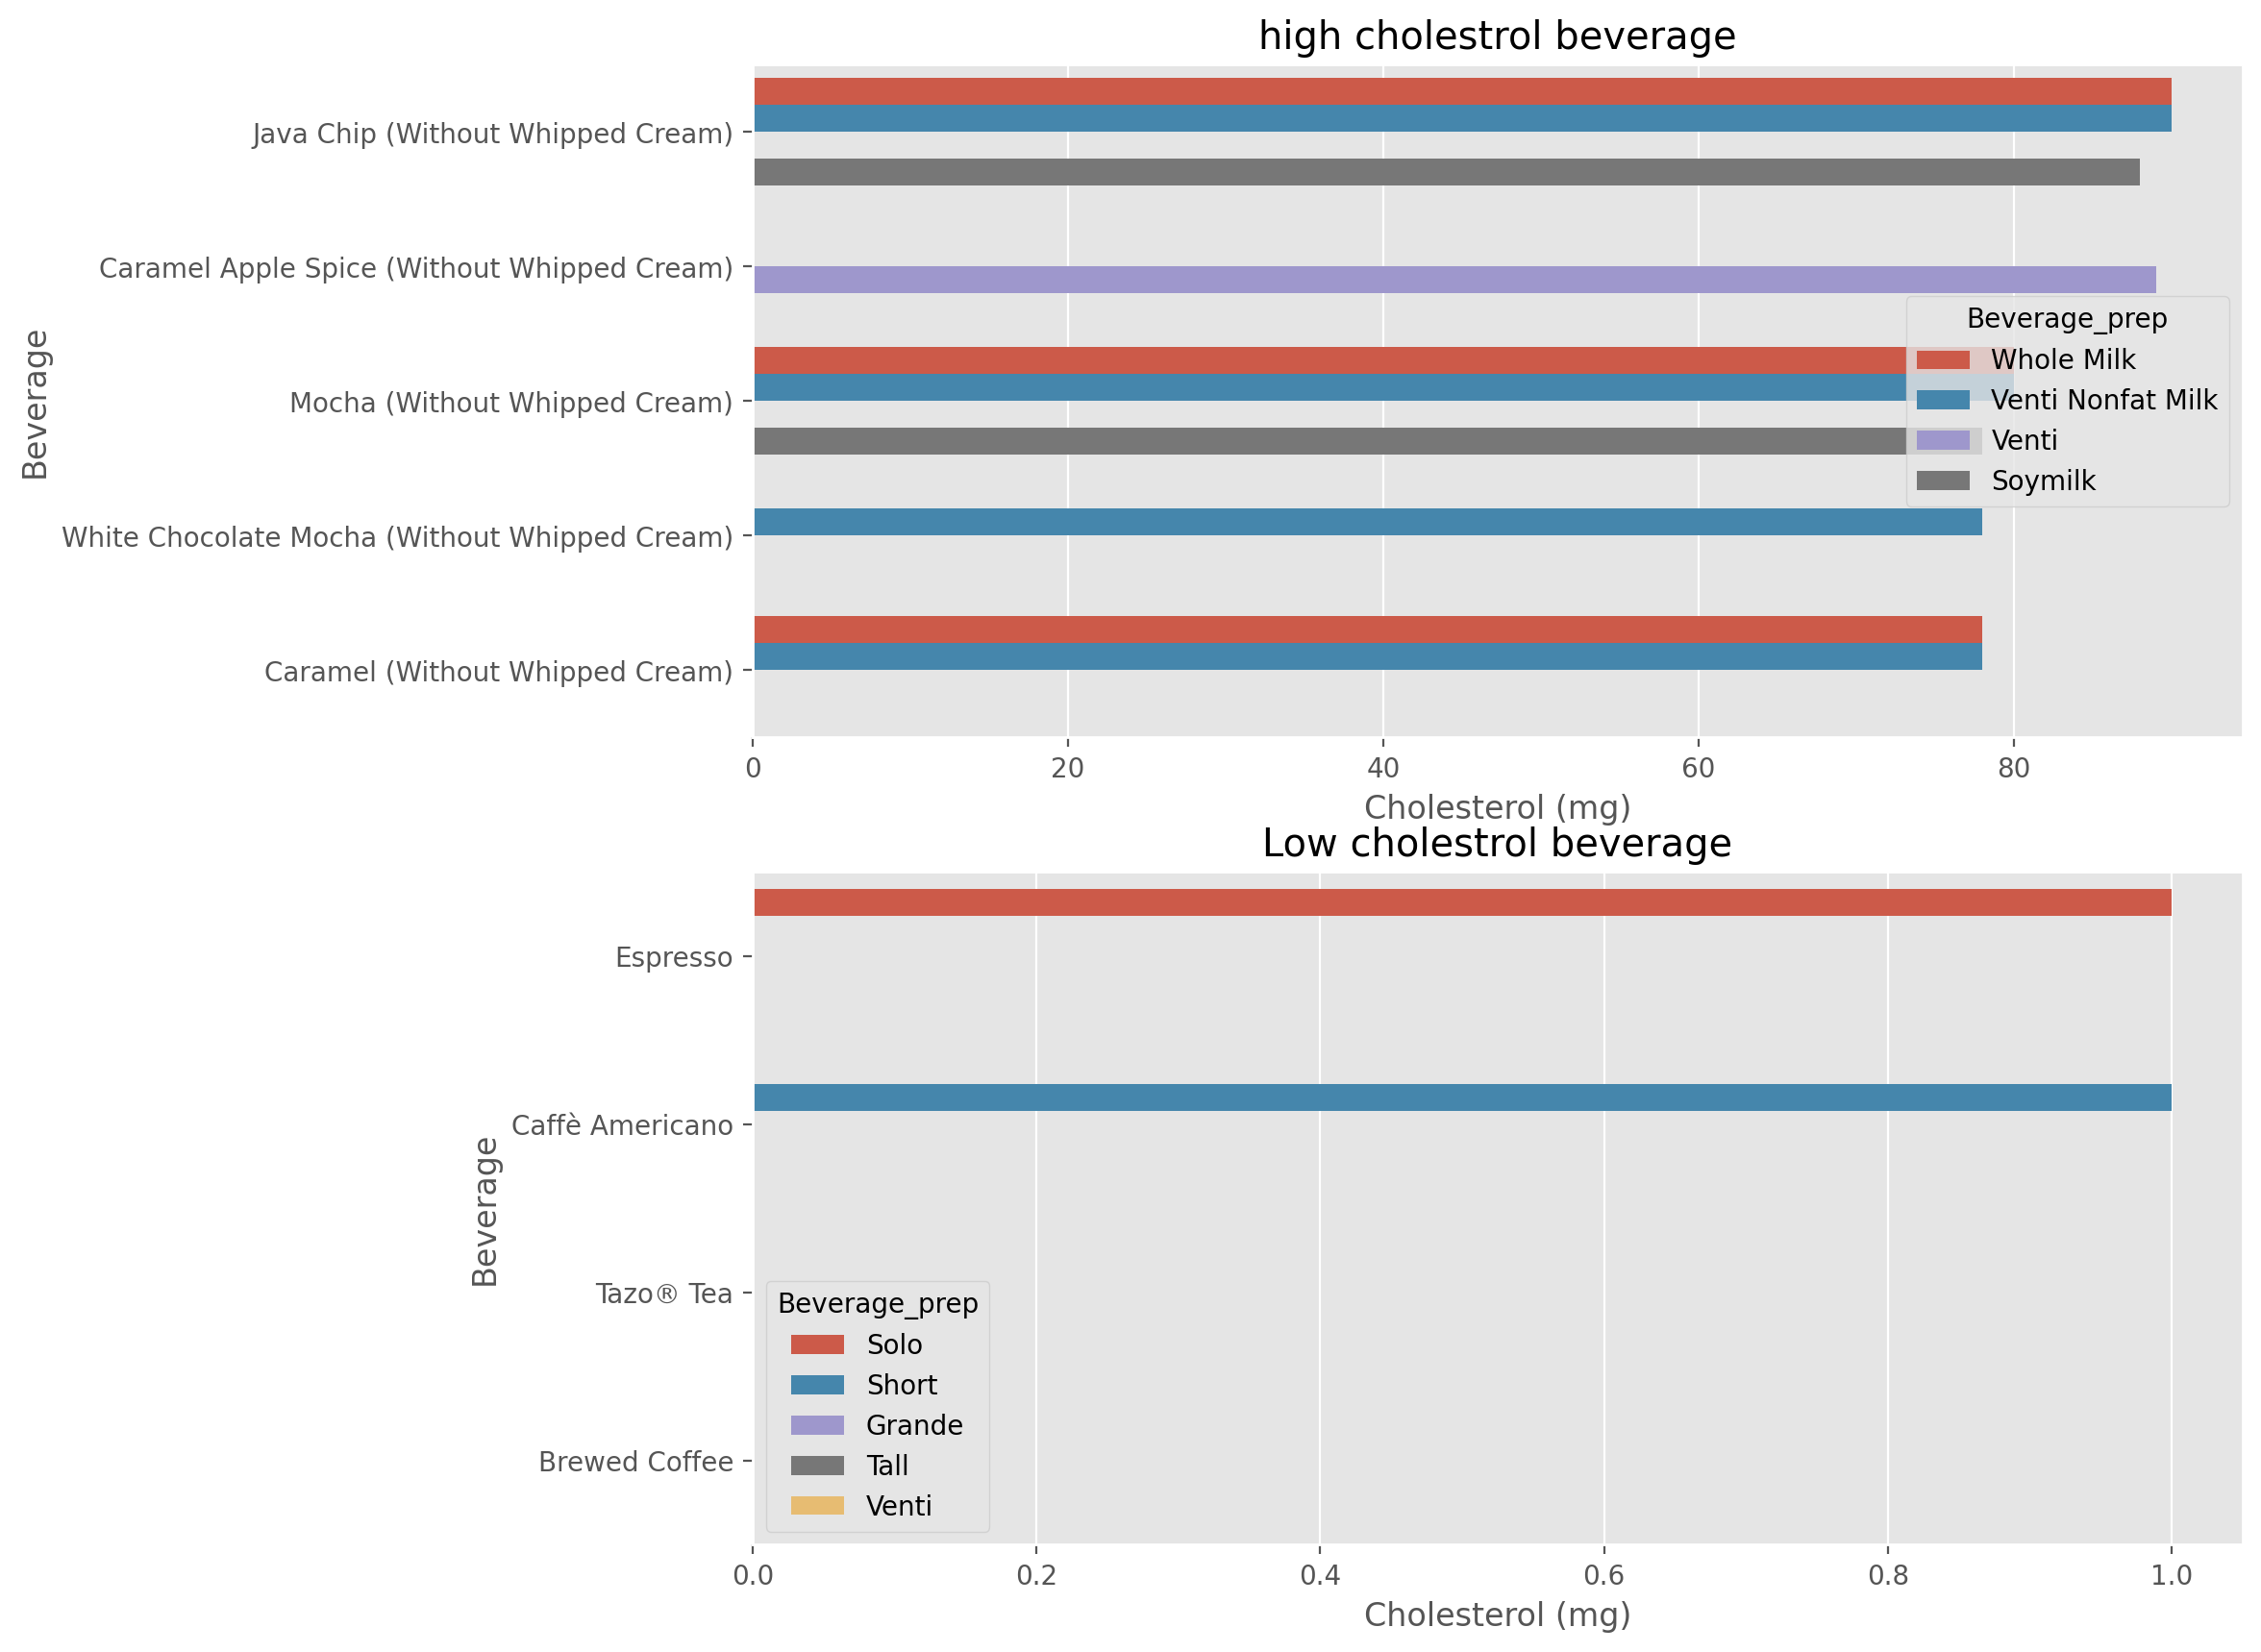

In [20]:
plt.figure(figsize=(10,10),dpi=200)

plt.subplot(2,1,1)
sns.barplot(y='Beverage',x="Cholesterol (mg)",hue="Beverage_prep",data=cholestrol.head(10))
plt.title("high cholestrol beverage")

plt.subplot(2,1,2)
sns.barplot(y='Beverage',x="Cholesterol (mg)",hue="Beverage_prep",data=cholestrol.tail(10))
plt.title("Low cholestrol beverage")

In [21]:
fibre=starbucks.sort_values(by =" Dietary Fibre (g)",ascending=False)
fibre

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
180,Smoothies,Strawberry Banana Smoothie,Soymilk,290,2.0,0.4,0.0,5,120,58,8,40,16.0,2%,100%,10%,8%,0
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10%,15%,20%,0%,Varies
179,Smoothies,Strawberry Banana Smoothie,2% Milk,290,2.0,1.0,0.0,5,125,58,7,41,16.0,4%,100%,10%,8%,0
178,Smoothies,Strawberry Banana Smoothie,Grande Nonfat Milk,290,1.0,0.3,0.0,5,125,58,7,41,16.0,4%,100%,10%,8%,0
174,Smoothies,Banana Chocolate Smoothie,Soymilk,290,4.5,1.5,0.0,5,150,51,7,31,19.0,6%,15%,20%,20%,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
106,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Short Nonfat Milk,100,0.1,0.1,0.0,0,50,22,0,21,4.0,6%,0%,10%,0%,50
107,Tazo® Tea Drinks,Tazo® Chai Tea Latte,2% Milk,120,2.0,1.0,0.1,10,55,22,0,21,4.0,6%,0%,10%,0%,50
108,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Soymilk,110,1.5,0.2,0.0,0,45,20,0,18,3.0,4%,0%,10%,6%,50


Text(0.5, 1.0, 'high fibre beverage')

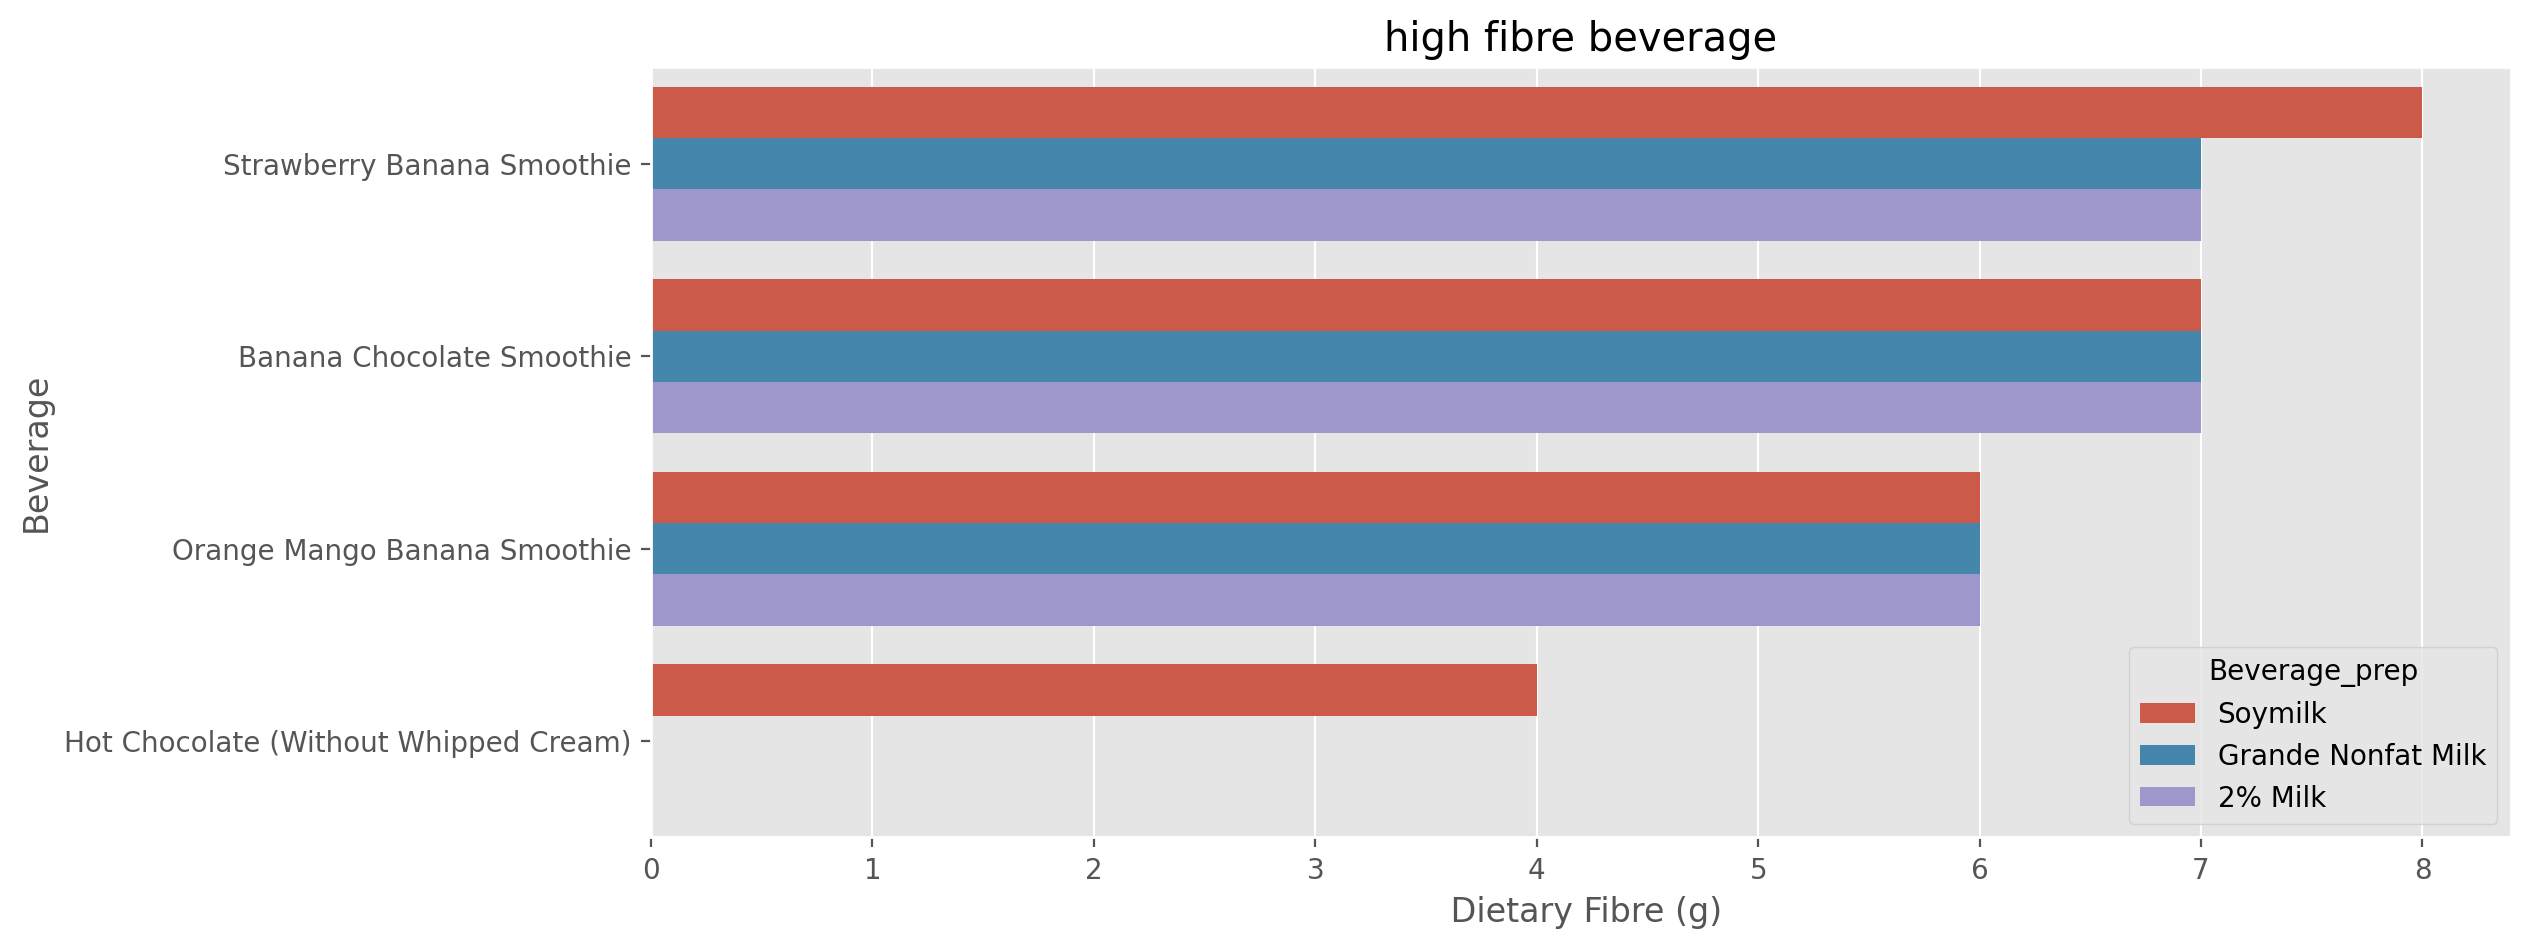

In [22]:
plt.figure(figsize=(12,5),dpi=200)

sns.barplot(y='Beverage',x= " Dietary Fibre (g)",hue="Beverage_prep",data=fibre.head(10))
plt.title("high fibre beverage")


In [23]:
sugar=starbucks.sort_values(by =" Sugars (g)",ascending=False)
sugar

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.0,4.0,0.0,5,340,90,2,84,7.0,10%,0%,20%,35%,145
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10.0,7.0,0.2,15,340,90,2,84,7.0,6%,0%,15%,35%,145
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0.0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8.0,4.5,0.0,0,330,88,3,80,6.0,6%,0%,20%,40%,145
206,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,370,5.0,3.0,0.1,15,300,78,0,77,5.0,8%,0%,15%,2%,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Classic Espresso Drinks,Espresso,Solo,5,0.0,0.0,0.0,0,0,1,0,0,0.4,0%,0%,0%,0%,75
57,Classic Espresso Drinks,Espresso,Doppio,10,0.0,0.0,0.0,0,1,2,0,0,1.0,0%,0%,0%,0%,150
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies


Text(0.5, 1.0, 'high sugar beverage')

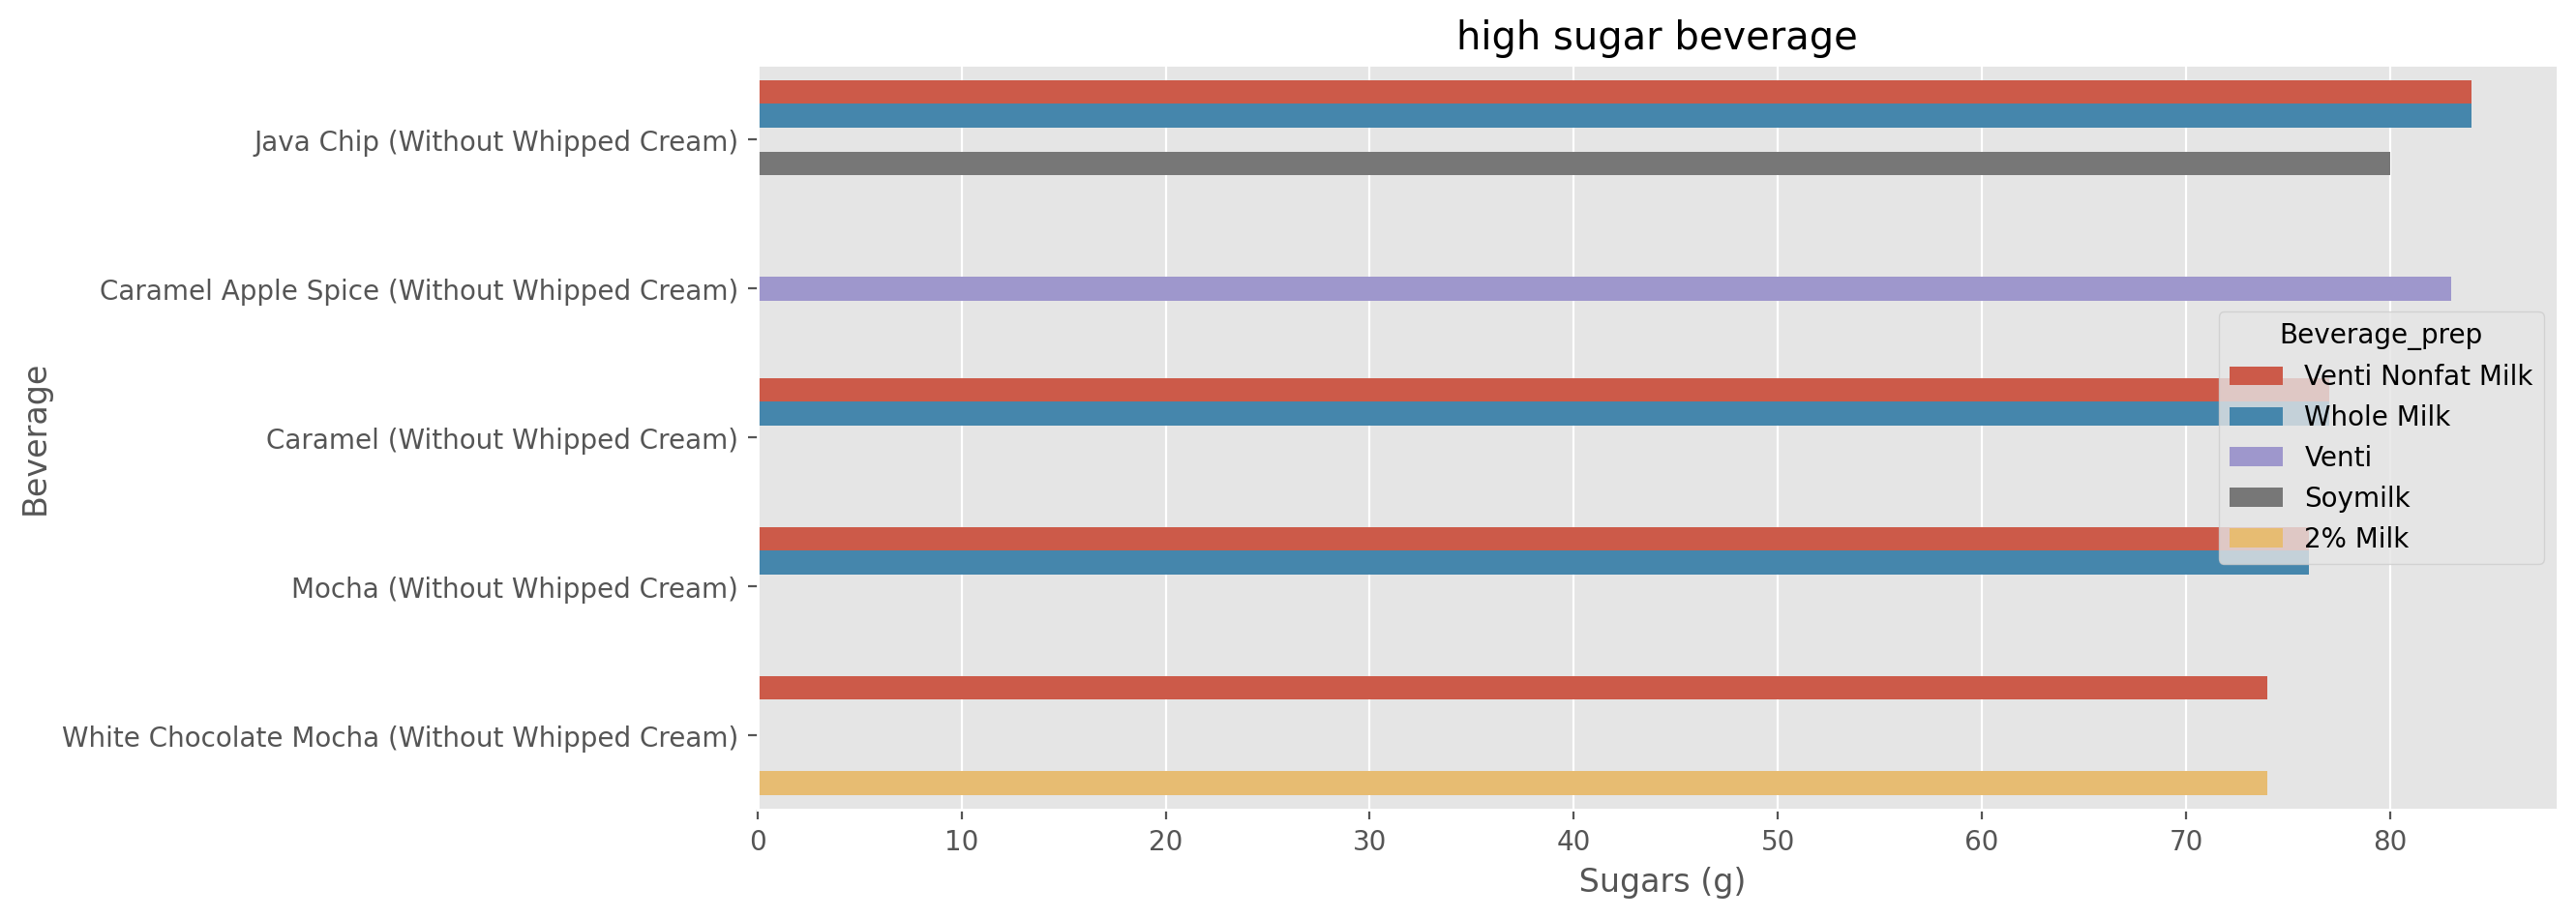

In [24]:
plt.figure(figsize=(12,5),dpi=200)

sns.barplot(y='Beverage',x=" Sugars (g)",hue="Beverage_prep",data=sugar.head(10))
plt.title("high sugar beverage")


In [25]:
protein=starbucks.sort_values(by =" Protein (g) ",ascending=False)
protein

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10%,15%,20%,0%,Varies
173,Smoothies,Banana Chocolate Smoothie,2% Milk,300,5.0,2.5,0.1,15,160,53,7,34,20.0,8%,15%,20%,20%,15
174,Smoothies,Banana Chocolate Smoothie,Soymilk,290,4.5,1.5,0.0,5,150,51,7,31,19.0,6%,15%,20%,20%,15
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7.0,6.0,0.0,10,310,78,0,74,19.0,25%,2%,60%,2%,150
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20%,4%,60%,2%,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0.0,0.0,0.0,0,25,89,0,83,0.0,0%,0%,0%,0%,0
98,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Short,140,0.0,0.0,0.0,0,10,35,0,33,0.0,0%,0%,0%,0%,0


Text(0.5, 1.0, 'high protein beverage')

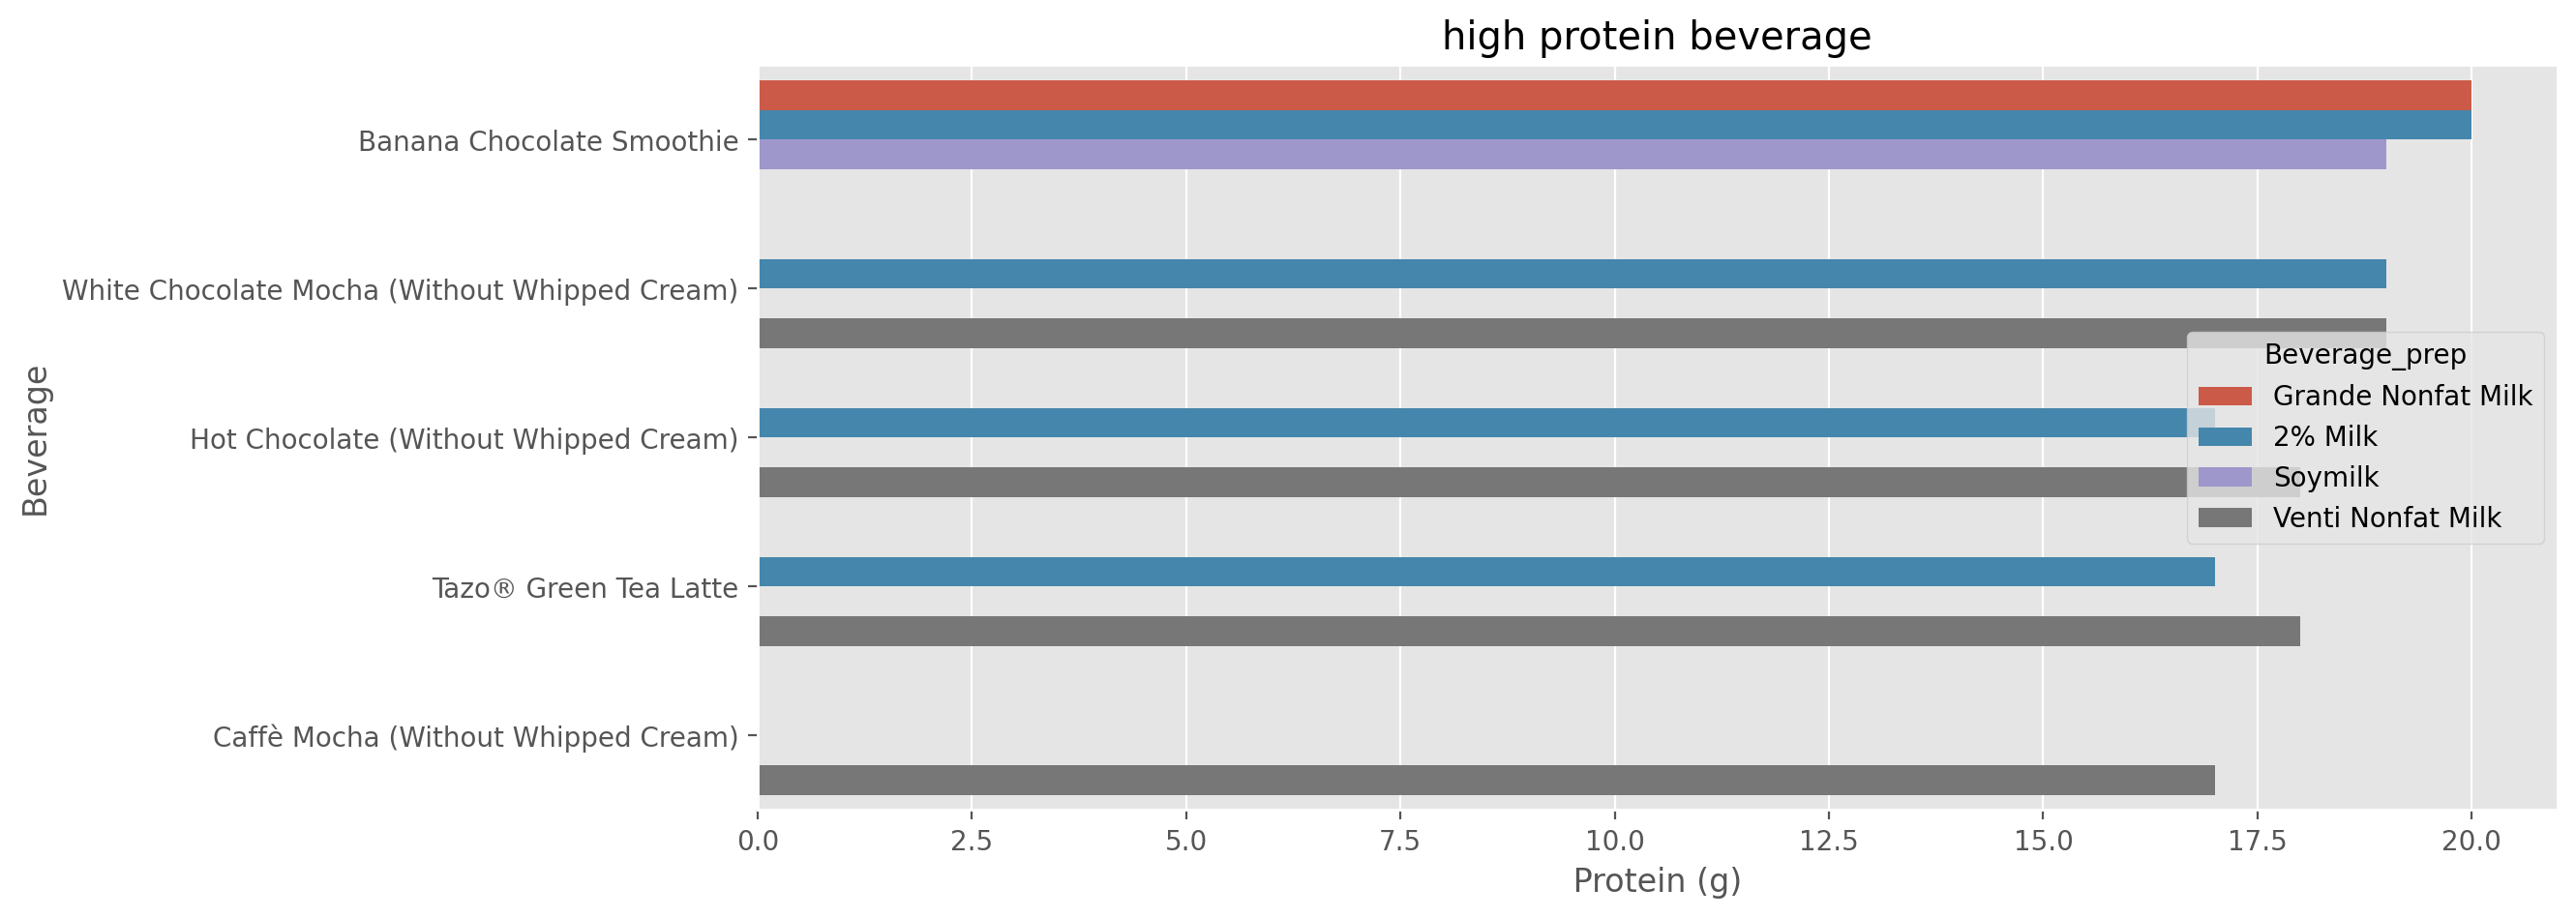

In [26]:
plt.figure(figsize=(12,5),dpi=200)

sns.barplot(y='Beverage',x=" Protein (g) ",hue="Beverage_prep",data=protein.head(10))
plt.title("high protein beverage")



In [27]:
starbucks["Vitamin A (% DV) "]=starbucks["Vitamin A (% DV) "].str.replace("%","")
starbucks["Vitamin A (% DV) "]=starbucks["Vitamin A (% DV) "].apply(int)

In [28]:
vit_A=starbucks.sort_values(by="Vitamin A (% DV) ",ascending=False)
vit_A

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
175,Smoothies,Orange Mango Banana Smoothie,Grande Nonfat Milk,260,1.0,0.3,0.0,5,120,54,6,37,16.0,50,80%,10%,30%,15
176,Smoothies,Orange Mango Banana Smoothie,2% Milk,270,1.5,0.5,0.0,5,125,53,6,37,16.0,50,80%,10%,6%,0
177,Smoothies,Orange Mango Banana Smoothie,Soymilk,270,1.5,0.4,0.0,5,120,53,6,36,15.0,50,80%,10%,6%,0
127,Tazo® Tea Drinks,Tazo® Green Tea Latte,Venti Nonfat Milk,370,0.5,0.3,0.0,10,200,73,2,71,18.0,30,20%,60%,6%,110
13,Classic Espresso Drinks,Caffè Latte,Venti Nonfat Milk,170,0.4,0.3,0.0,10,190,25,0,23,16.0,30,0%,50%,0%,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Classic Espresso Drinks,Espresso,Doppio,10,0.0,0.0,0.0,0,1,2,0,0,1.0,0,0%,0%,0%,150
56,Classic Espresso Drinks,Espresso,Solo,5,0.0,0.0,0.0,0,0,1,0,0,0.4,0,0%,0%,0%,75
43,Classic Espresso Drinks,Caffè Americano,Venti,25,0.0,0.0,0.0,0,15,4,0,0,1.0,0,0%,2%,0%,300
42,Classic Espresso Drinks,Caffè Americano,Grande,15,0.0,0.0,0.0,0,15,3,0,0,1.0,0,0%,2%,0%,225


Text(0.5, 1.0, 'high Vitamin A contained beverage')

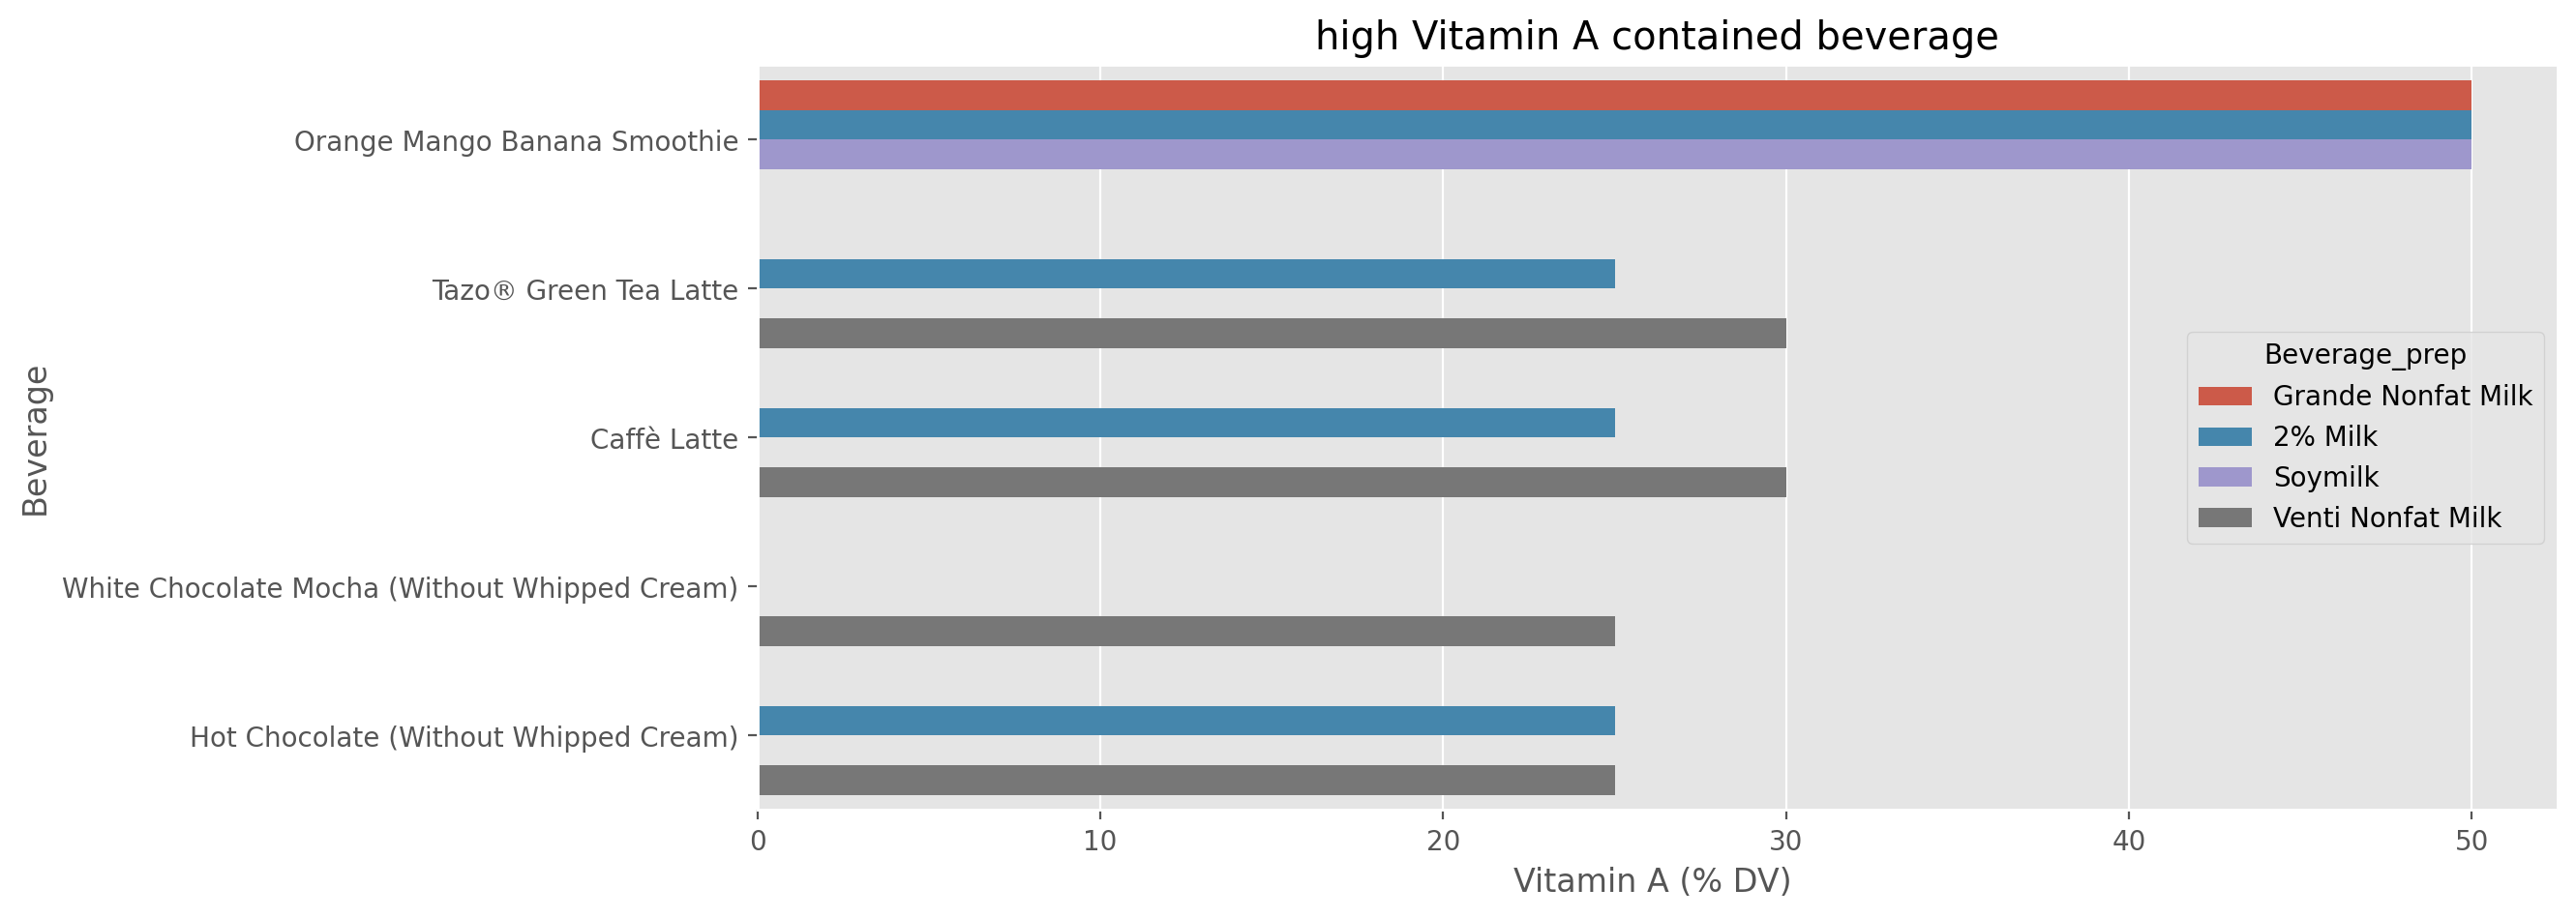

In [29]:
plt.figure(figsize=(12,5),dpi=200)

sns.barplot(y='Beverage',x="Vitamin A (% DV) ",hue="Beverage_prep",data=vit_A.head(10))
plt.title("high Vitamin A contained beverage")


In [30]:
starbucks["Vitamin C (% DV)"]=starbucks["Vitamin C (% DV)"].str.replace("%","")
starbucks["Vitamin C (% DV)"]=starbucks["Vitamin C (% DV)"].apply(int)

In [31]:
vit_C=starbucks.sort_values(by ="Vitamin C (% DV)",ascending=False)
vit_C

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
180,Smoothies,Strawberry Banana Smoothie,Soymilk,290,2.0,0.4,0.0,5,120,58,8,40,16.0,2,100,10%,8%,0
179,Smoothies,Strawberry Banana Smoothie,2% Milk,290,2.0,1.0,0.0,5,125,58,7,41,16.0,4,100,10%,8%,0
178,Smoothies,Strawberry Banana Smoothie,Grande Nonfat Milk,290,1.0,0.3,0.0,5,125,58,7,41,16.0,4,100,10%,8%,0
177,Smoothies,Orange Mango Banana Smoothie,Soymilk,270,1.5,0.4,0.0,5,120,53,6,36,15.0,50,80,10%,6%,0
176,Smoothies,Orange Mango Banana Smoothie,2% Milk,270,1.5,0.5,0.0,5,125,53,6,37,16.0,50,80,10%,6%,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,200,6.0,1.5,0.0,0,95,32,2,25,9.0,10,0,30%,30%,20
92,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Grande Nonfat Milk,240,2.5,1.5,0.0,5,140,48,2,41,14.0,20,0,40%,25%,25
94,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,250,7.0,2.0,0.0,0,125,41,3,32,12.0,15,0,40%,40%,25
95,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Venti Nonfat Milk,320,3.0,2.0,0.0,10,180,63,2,55,18.0,25,0,50%,30%,30


Text(0.5, 1.0, 'high vitamin C contained beverage')

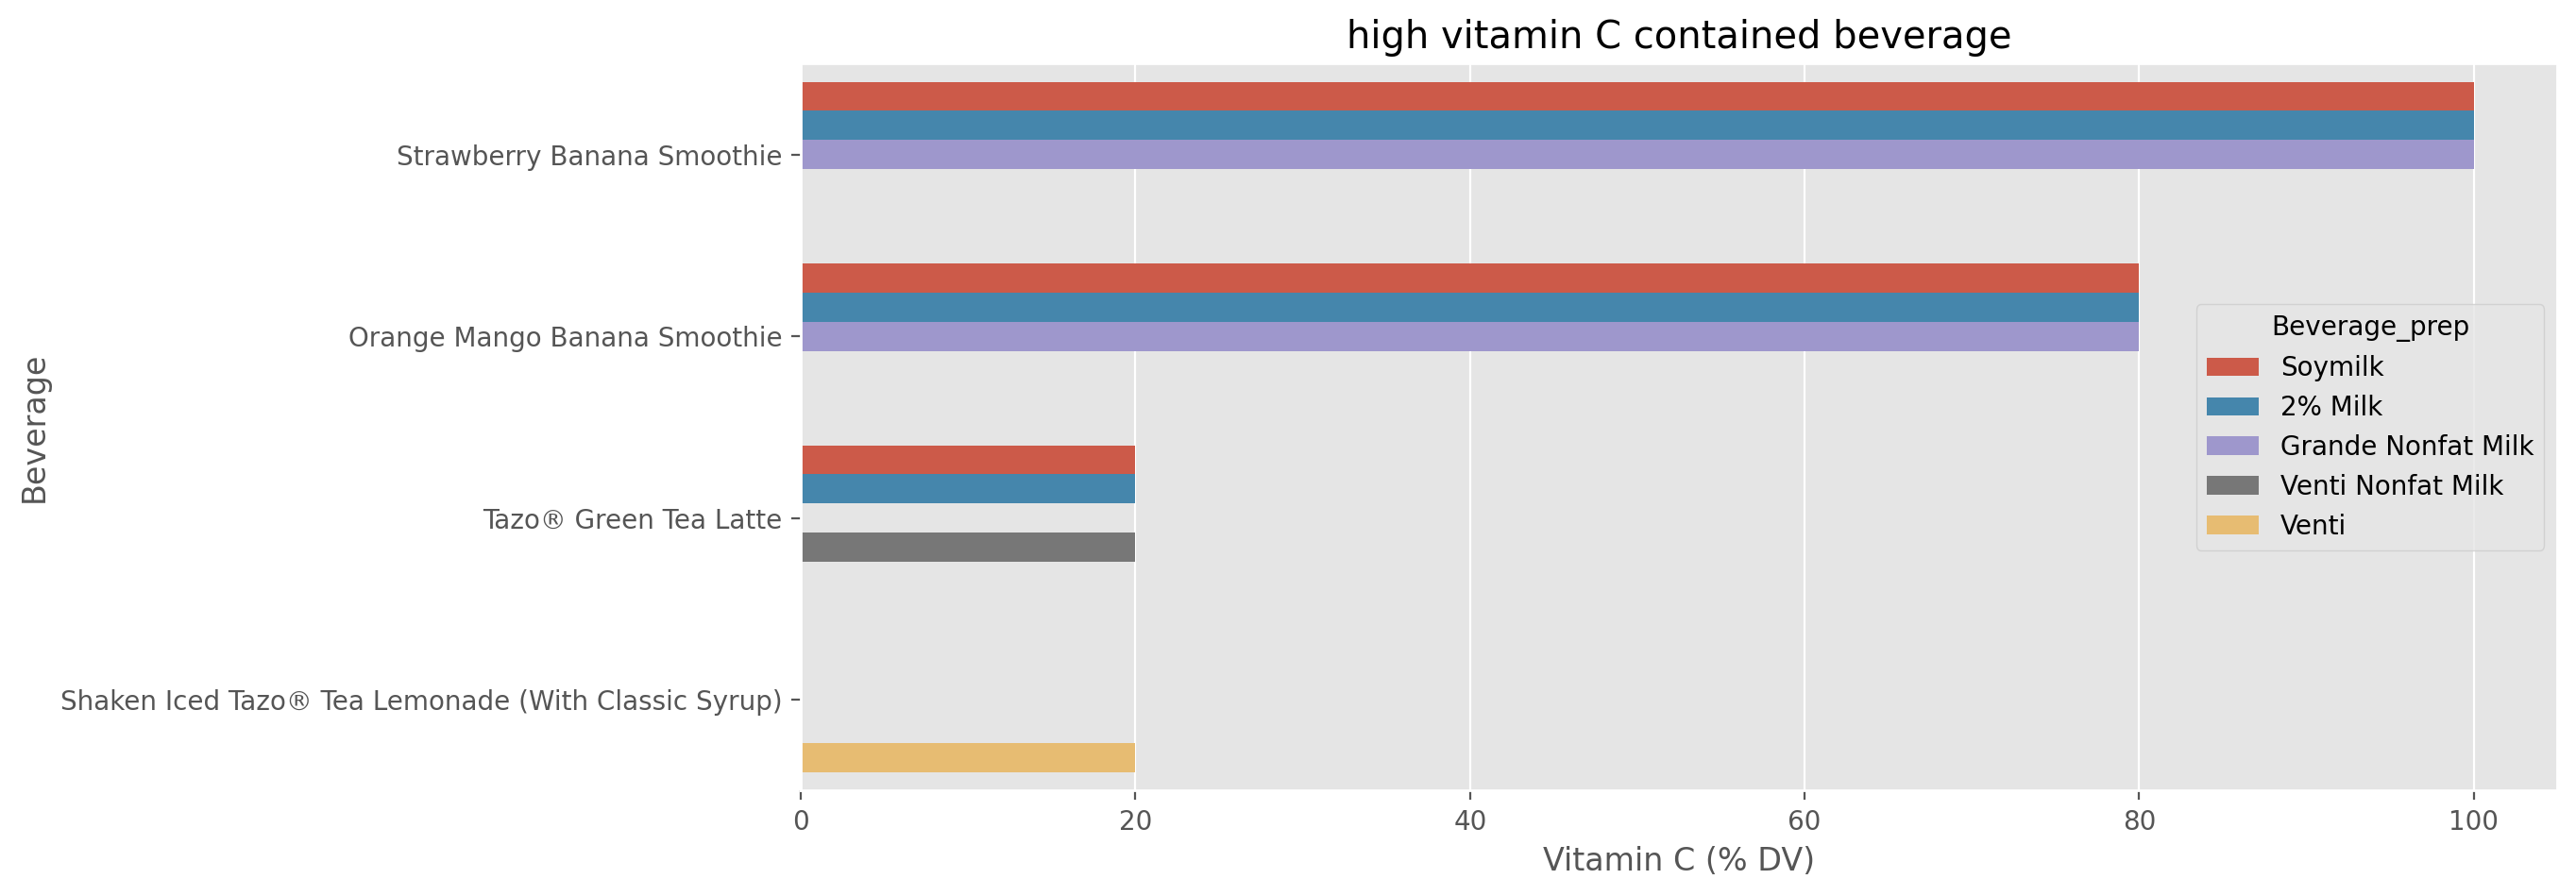

In [32]:
plt.figure(figsize=(12,5),dpi=200)

sns.barplot(y='Beverage',x="Vitamin C (% DV)",hue="Beverage_prep",data=vit_C.head(10))
plt.title("high vitamin C contained beverage")


In [33]:
starbucks[" Calcium (% DV) "]=starbucks[" Calcium (% DV) "].str.replace("%","")
starbucks[" Calcium (% DV) "]=starbucks[" Calcium (% DV) "].apply(int)

In [34]:
calcium=starbucks.sort_values(by=" Calcium (% DV) ",ascending=False)
calcium

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,13.0,6.0,0.0,5,290,70,1,64,16.0,15,2,60,20%,150
129,Tazo® Tea Drinks,Tazo® Green Tea Latte,Soymilk,390,8.0,1.0,0.0,0,180,64,4,58,14.0,20,20,60,30%,110
127,Tazo® Tea Drinks,Tazo® Green Tea Latte,Venti Nonfat Milk,370,0.5,0.3,0.0,10,200,73,2,71,18.0,30,20,60,6%,110
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,7.0,6.0,0.0,10,310,78,0,74,19.0,25,2,60,2%,150
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20,4,60,2%,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Venti,190,0.0,0.0,0.0,0,0,49,0,49,0.1,0,20,0,0%,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0%,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0%,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0%,Varies


Text(0.5, 1.0, 'high calcium beverage')

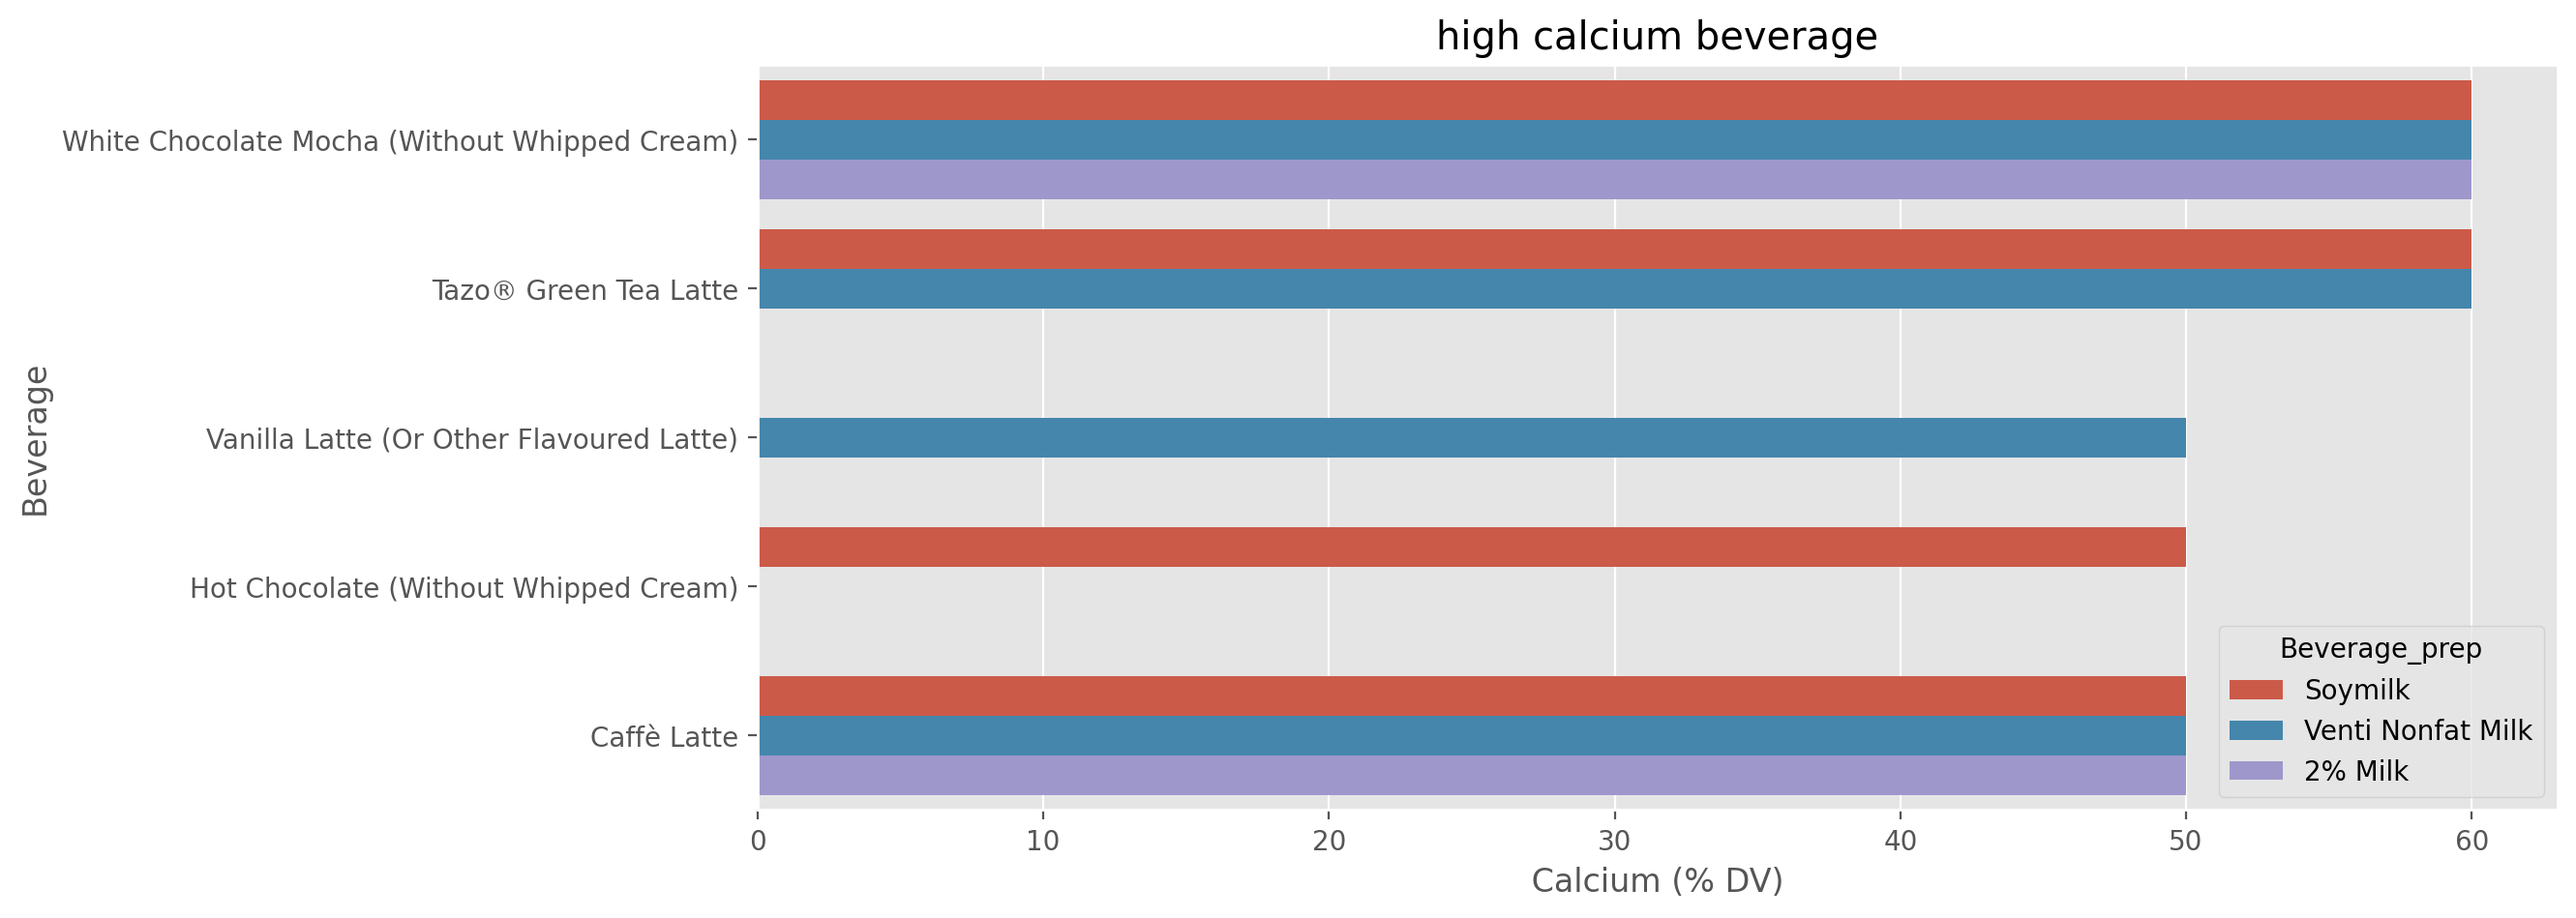

In [35]:
plt.figure(figsize=(12,5),dpi=200)

sns.barplot(y='Beverage',x=" Calcium (% DV) ",hue="Beverage_prep",data=calcium.head(10))
plt.title("high calcium beverage")


In [36]:
starbucks["Iron (% DV) "]=starbucks["Iron (% DV) "].str.replace("%","")
starbucks["Iron (% DV) "]=starbucks["Iron (% DV) "].str.replace(".00","")
starbucks["Iron (% DV) "]=starbucks["Iron (% DV) "].apply(int)

In [37]:
iron=starbucks.sort_values(by="Iron (% DV) ",ascending=False)
iron

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
27,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,290,9.0,2.5,0.0,0,140,47,4,33,14.0,15,0,45,50,180
97,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,330,9.0,2.5,0.0,0,160,55,4,44,15.0,15,0,50,50,30
94,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),Soymilk,250,7.0,2.0,0.0,0,125,41,3,32,12.0,15,0,40,40,25
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8.0,4.5,0.0,0,330,88,3,80,6.0,6,0,20,40,145
24,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Soymilk,230,7.0,2.0,0.0,0,105,37,3,26,11.0,10,0,35,40,175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0,Varies
106,Tazo® Tea Drinks,Tazo® Chai Tea Latte,Short Nonfat Milk,100,0.1,0.1,0.0,0,50,22,0,21,4.0,6,0,10,0,50


Text(0.5, 1.0, 'high iron content beverage')

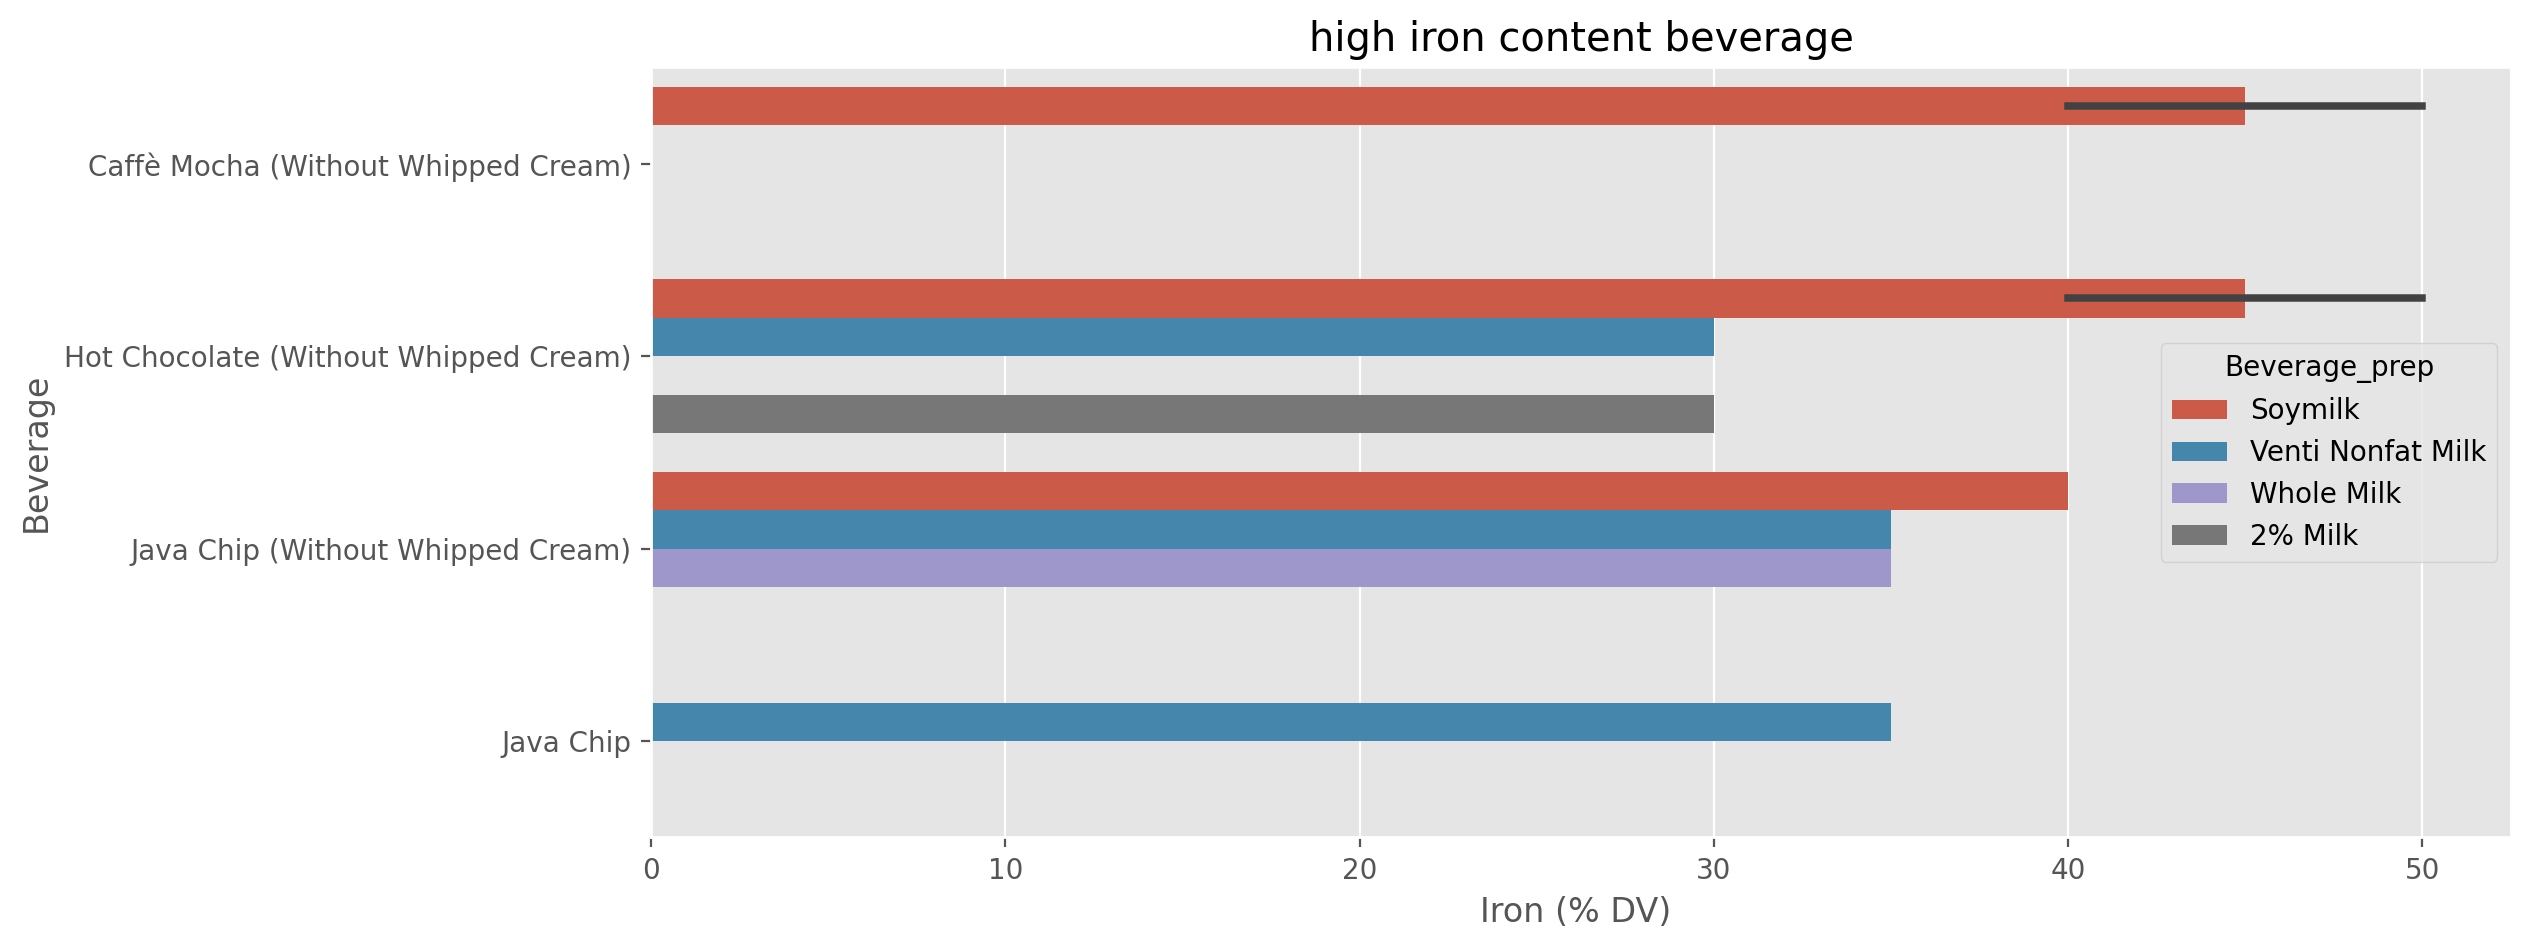

In [38]:
plt.figure(figsize=(12,5),dpi=200)

sns.barplot(y='Beverage',x="Iron (% DV) ",hue="Beverage_prep",data=iron.head(10))
plt.title("high iron content beverage")

In [39]:
starbucks=starbucks[starbucks['Caffeine (mg)']!='Varies']
starbucks=starbucks[starbucks['Caffeine (mg)']!='varies']
starbucks['Caffeine (mg)'].replace(np.nan,0,inplace=True)
starbucks['Caffeine (mg)']=starbucks['Caffeine (mg)'].apply(int)

In [40]:
caffeine=starbucks.sort_values(by ='Caffeine (mg)',ascending=False)
caffeine

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
43,Classic Espresso Drinks,Caffè Americano,Venti,25,0.0,0.0,0.0,0,15,4,0,0,1.0,0,0,2,0,300
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
156,Shaken Iced Beverages,Iced Brewed Coffee (With Classic Syrup),Venti,130,0.1,0.0,0.0,0,5,31,0,31,0.4,0,0,0,0,235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1.0,0.5,0.0,5,25,18,0,18,2.0,2,0,6,0,0
176,Smoothies,Orange Mango Banana Smoothie,2% Milk,270,1.5,0.5,0.0,5,125,53,6,37,16.0,50,80,10,6,0
177,Smoothies,Orange Mango Banana Smoothie,Soymilk,270,1.5,0.4,0.0,5,120,53,6,36,15.0,50,80,10,6,0
178,Smoothies,Strawberry Banana Smoothie,Grande Nonfat Milk,290,1.0,0.3,0.0,5,125,58,7,41,16.0,4,100,10,8,0


Text(0.5, 1.0, 'high caffeine beverage')

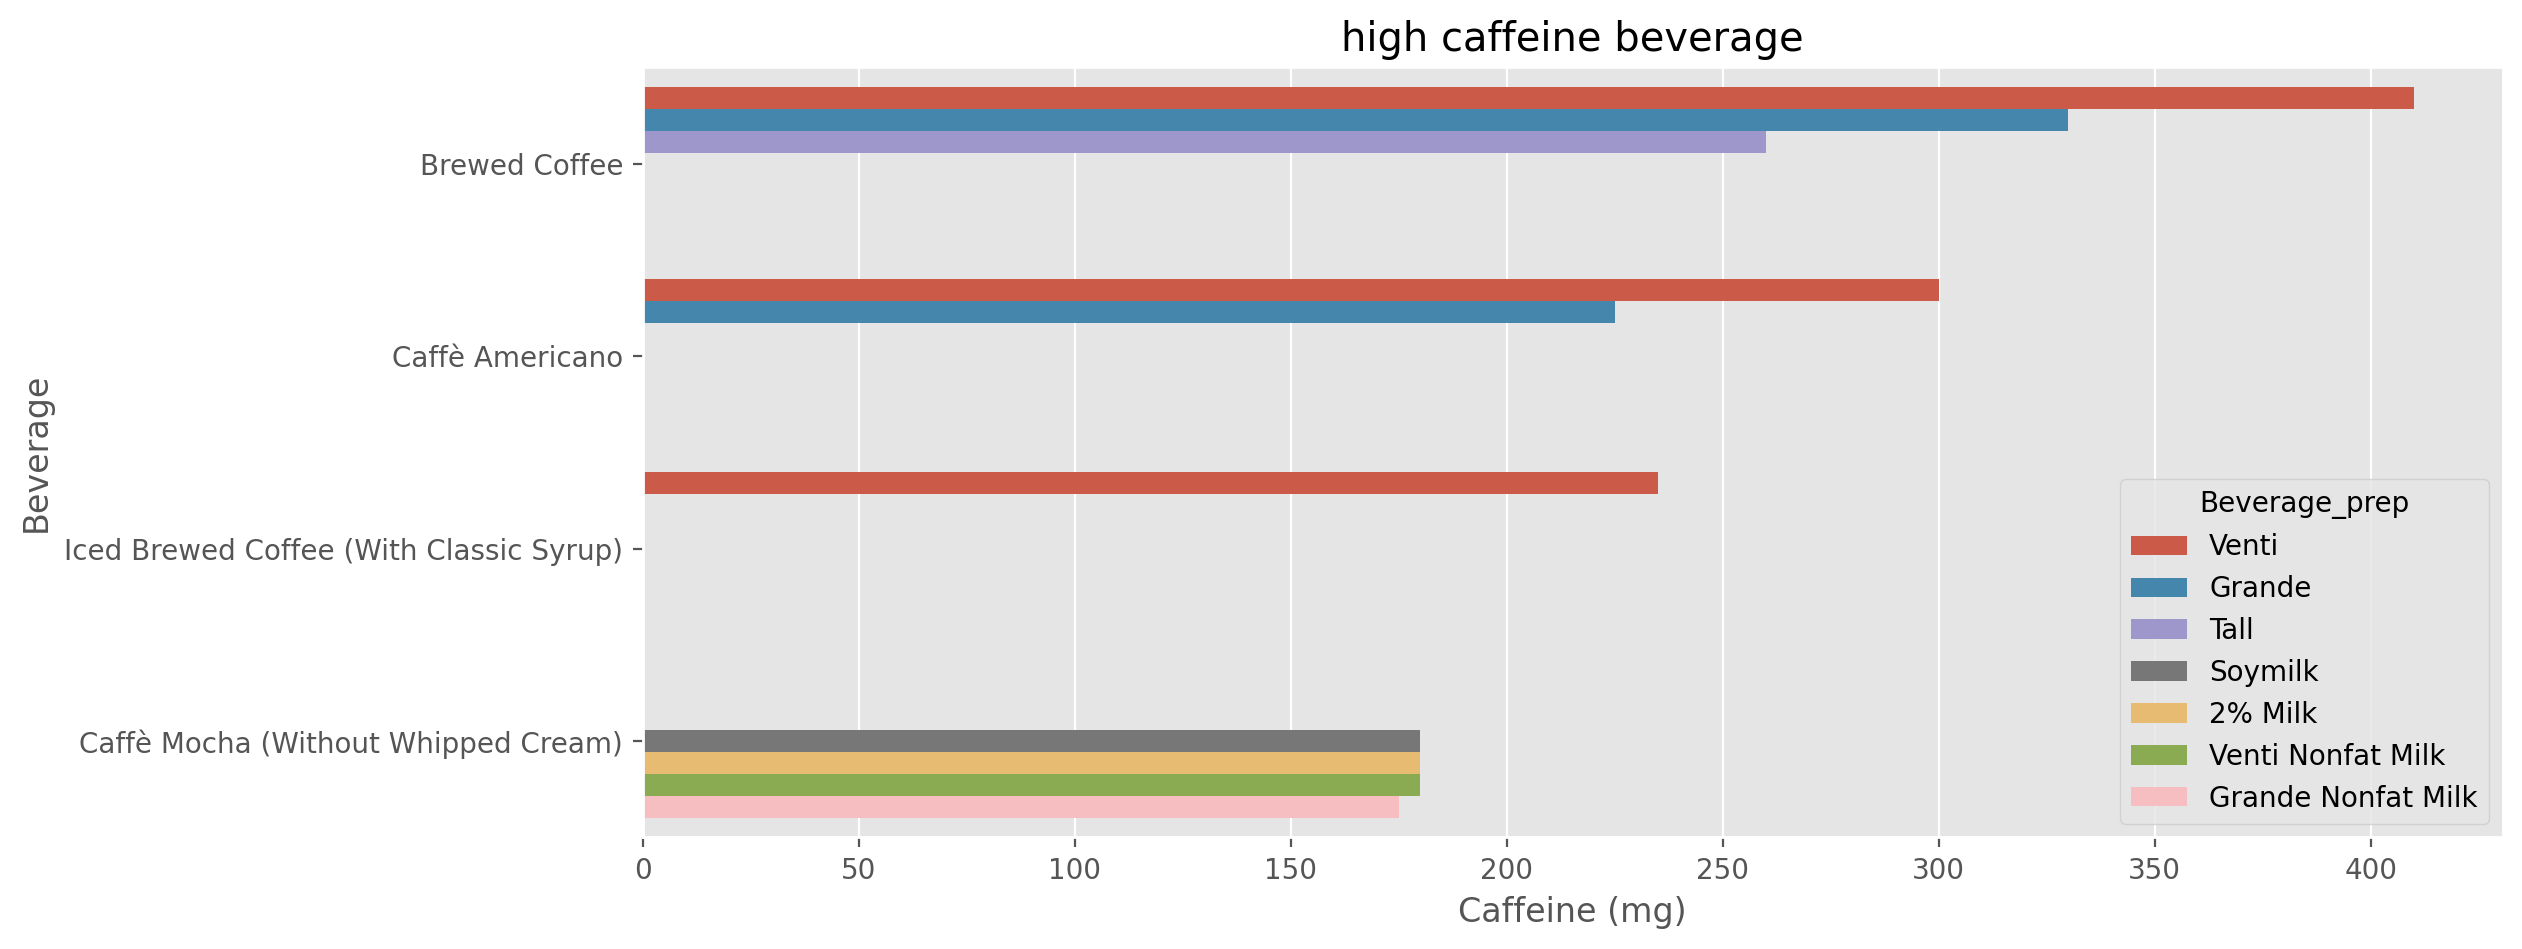

In [41]:
plt.figure(figsize=(12,5),dpi=200)

sns.barplot(y='Beverage',x='Caffeine (mg)',hue="Beverage_prep",data=caffeine.head(10))
plt.title("high caffeine beverage")


In [42]:
starbucks.corr()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Calories,1.000000,0.620398,0.635440,0.325883,0.373547,0.783966,0.937914,0.369126,0.908817,0.546193,0.370343,0.213281,0.485662,0.412398,-0.039691
Total Fat (g),0.620398,1.000000,0.888990,0.617329,0.579806,0.413336,0.352564,0.251997,0.310916,0.538515,0.291009,-0.030059,0.604520,0.497957,0.115649
Trans Fat (g),0.635440,0.888990,1.000000,0.692065,0.700684,0.501018,0.425532,0.114838,0.407348,0.481984,0.278956,-0.052110,0.474276,0.332285,0.138937
Saturated Fat (g),0.325883,0.617329,0.692065,1.000000,0.919855,0.221753,0.152413,-0.097154,0.169382,0.284562,0.236087,-0.040370,0.275462,-0.076925,0.024262
Sodium (mg),0.373547,0.579806,0.700684,0.919855,1.000000,0.261393,0.180294,-0.072995,0.187675,0.493479,0.443378,0.027560,0.450064,-0.117456,0.056867
Total Carbohydrates (g),0.783966,0.413336,0.501018,0.221753,0.261393,1.000000,0.766888,0.137311,0.778874,0.347696,0.252863,0.013829,0.346772,0.271779,0.079478
Cholesterol (mg),0.937914,0.352564,0.425532,0.152413,0.180294,0.766888,1.000000,0.327712,0.984795,0.319000,0.205931,0.215518,0.223095,0.343735,-0.105164
Dietary Fibre (g),0.369126,0.251997,0.114838,-0.097154,-0.072995,0.137311,0.327712,1.000000,0.173207,0.513766,0.277790,0.735675,0.127140,0.611082,-0.183769
Sugars (g),0.908817,0.310916,0.407348,0.169382,0.187675,0.778874,0.984795,0.173207,1.000000,0.225940,0.151388,0.107505,0.197566,0.243955,-0.090984
Protein (g),0.546193,0.538515,0.481984,0.284562,0.493479,0.347696,0.319000,0.513766,0.225940,1.000000,0.798396,0.380051,0.841374,0.350116,0.031988


In [ ]:
plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(starbucks.corr(),annot=True)

<AxesSubplot:>

## Reports on data analysis

### Analysis on the variety of drinks
 - There are 242 varities of drinks available at Starbucks.
 - The classic Espresso Drinks have the highest varities with 58 options.
 - Second highest is the Tazo® Tea Drinks with 52 varities
 - Coffee has only 4 options being the least number.
 
### Analysing the drinks based on the nutritional facts
 #### - Calories
       * Classic Espresso Drinks has the highest calorie drink with a calorie of 510 calories and coffee has a drink option 
         with least calorie of 5 calories
       * White Chocolate Mocha (Without Whipped Cream) prepared with 2% Milk is the highest caloried drink (510 calories0
       * Brewed coffee (short) is the least caloried drink in starbucks
       
 #### - Total_Fat
       * White Chocolate Mocha (Without Whipped Cream) prepared with 2% Milk has the highest fat content(15 g)
       
 #### - Sodium
       * Tazo® Green Tea Latte has highest sodium of 40 g
       * Vanilla Latte (Or Other Flavoured Latte), White Chocolate Mocha (Without Whipped Cream), Caramel Macchiato and
         Hot Chocolate (Without Whipped Cream) are the second highest sodium content drinks with 35g
 #### - Carbohydrates
       * Java Chip (Without Whipped Cream) made with whole milk and venti non-fat milk has high carbohydrates of 340g
      
 #### - Cholestrol
       * Java Chip (Without Whipped Cream) made with whole milk and venti non-fat milk has the highest cholestrol content of 
         90 mg
       * Tazo tea and brewed coffee has 0 cholestrol
 
 #### - Fibre
       * Strawberry Banana Smoothie made with soya milk has the highest fibre content of 8g followed by all other smoothies 
         with 7g per drink
     
 #### - Sugars
       * Java Chip (Without Whipped Cream) made with venti non-fat milk and whole milk has high sugar content of 84 g
       * Caramel Apple Spice (Without Whipped Cream) made with venti non-fat milk has 83 g of sugar being the second highest
       
 #### - Protein
       * Banana Chocolate Smoothie made with Grande non-fat milk and 2% milk has high protein of 20g
       
 #### - Vitamin-A
       * Orange Mango Banana Smoothie has the highest vitamin -A content with 50 % DV
       
 #### - Vitamin-C
       * Strawberry Banana Smoothie has the highest vitamin -C content with 100 % DV
       
 #### - Calcium
       * White Chocolate Mocha (Without Whipped Cream) and Tazo® Green Tea Latte has highest calcium of 60 % DV
       
 #### - Iron
       * Caffè Mocha (Without Whipped Cream) with soya milk and Hot Chocolate (Without Whipped Cream) with soya milk has 
         highest iron content of 50 % DV
         
 #### - Caffeine
       * Brewed coffee made with venti non-fat milk has the highest caffeine of 410 mg
       
 #### - Correlation between the nutrition facts
       * sugar and cholestrol has highest correlation of .98
       * cholestrol and calories have a correlation of .94
       * sodium and saturated fats have a correlation of .92
       * sugar and calories have a correlation of .91
       * Transfat and total fat have a correlation of .89
       * protein and calcium have a correlation of .84
       * vitamin A and protein have a correlation of .8

## Conclusion

    - Brewed coffee is the highest caffeine contained drink in starbucks
    - White chocolate mocha is the one drink which has the highest calories, fat, sodium and calcium.
    - Smoothies are the healthiest drink at starbucks which contains good amount of fibre, protein, vitamin A and vitamin C.
    - Drinks made with soya milk are rich in vitamin A, vitamin C, calcium and iron.
    - Javachip (without whipped cream) is the highest carbohydrated drink at starbucks which also has high cholestrol and 
      sugar also
    - There is a high correlation between sugar and cholestrol which justifies the recent research which says that excess 
      sugar leads to cholestrol.